In [1]:
suppressWarnings(suppressMessages({
    library(Signac)
    library(Seurat)
    library(EnsDb.Mmusculus.v79)
    library(tidyverse)
    library(SingleR)
}))
set.seed(1)
color_protocol <- c("#0067AA","#FF7F00","#00A23F","#FF1F1D","#A763AC","#B45B5D","#FF8AB6","#B6B800","#01C1CC","#85D5F8","#FFC981","#C8571B","#727272","#EFC800","#8A5626","#502E91","#59A4CE","#344B2B","#FBE29D","#FDD6E6","#849C8C","#F07C6F","#000101")

[1] 181730   7371

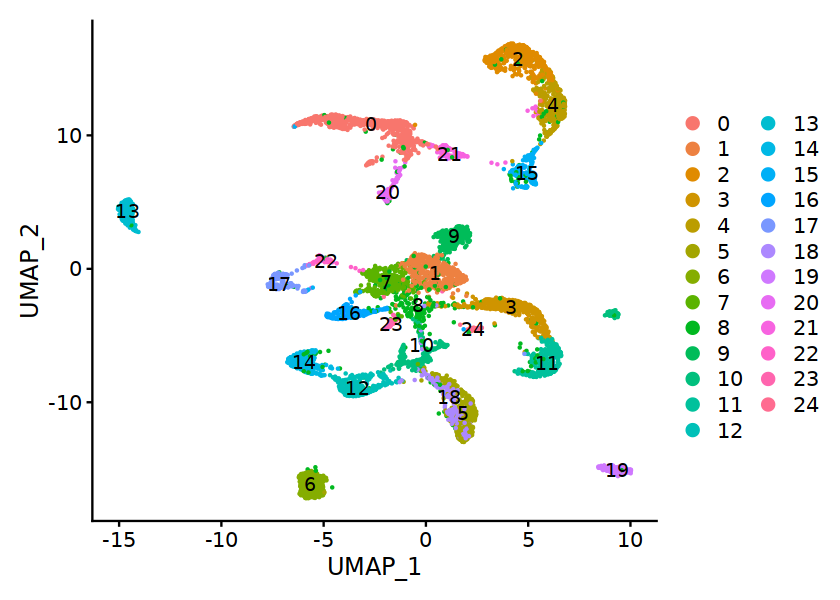

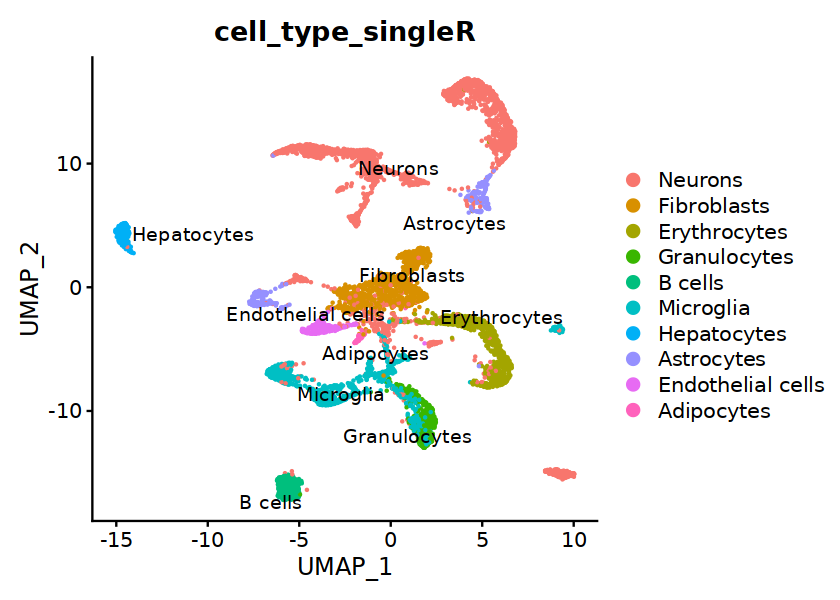

In [2]:
data_seurat <- readRDS("../data/2023-10-08_mouse_display/A0920_3_ME_YSPB_WX_D_T7_EDTA5030_outdir/mouse.rds")
dim(data_seurat)

options(repr.plot.height = 5, repr.plot.width = 7)
DimPlot(data_seurat,label = T)

options(repr.plot.height = 5, repr.plot.width = 7)
DimPlot(data_seurat, group.by = "cell_type_singleR",label = T,repel = T)

Idents(data_seurat) <- data_seurat$cell_type_singleR

In [7]:
?FeaturePlot

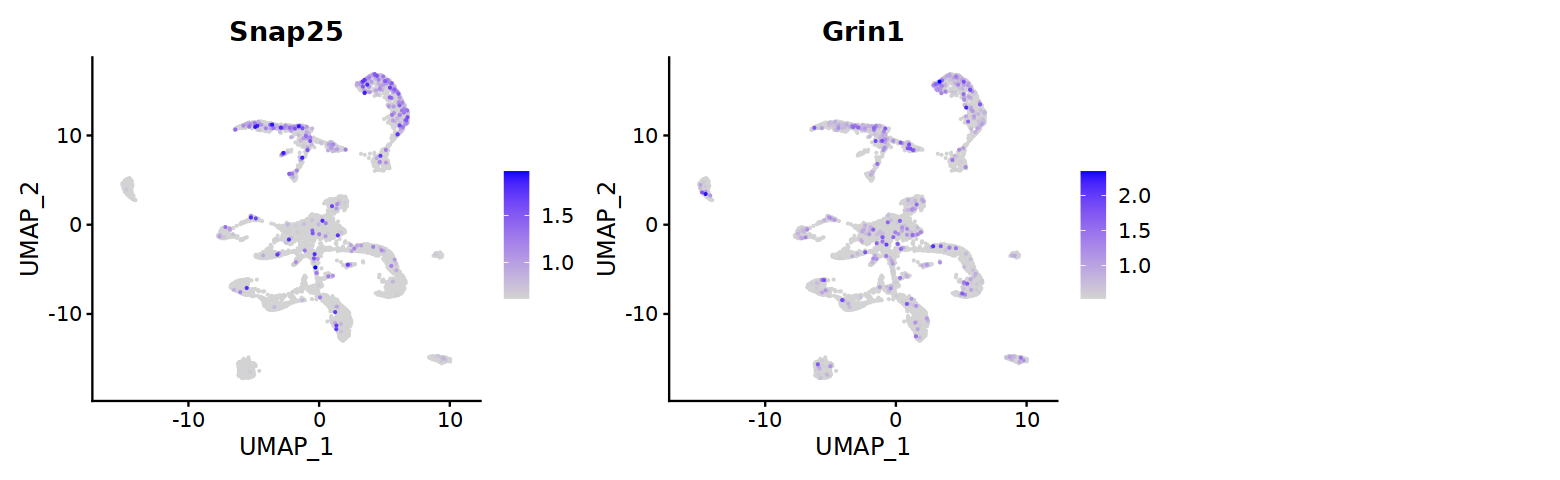

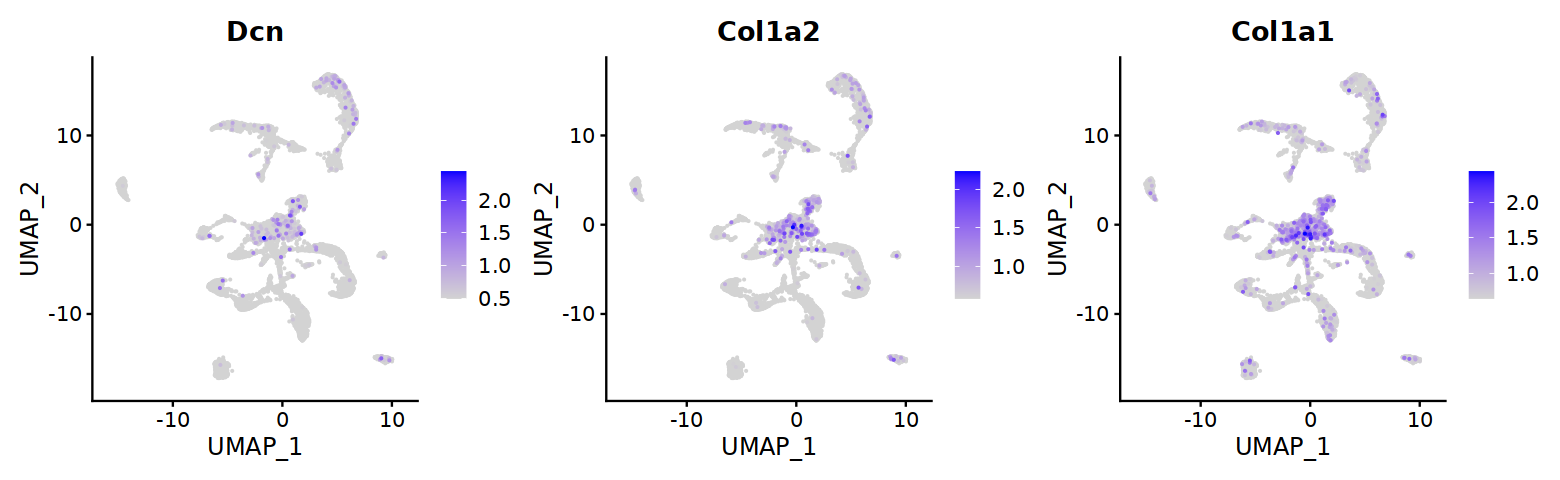

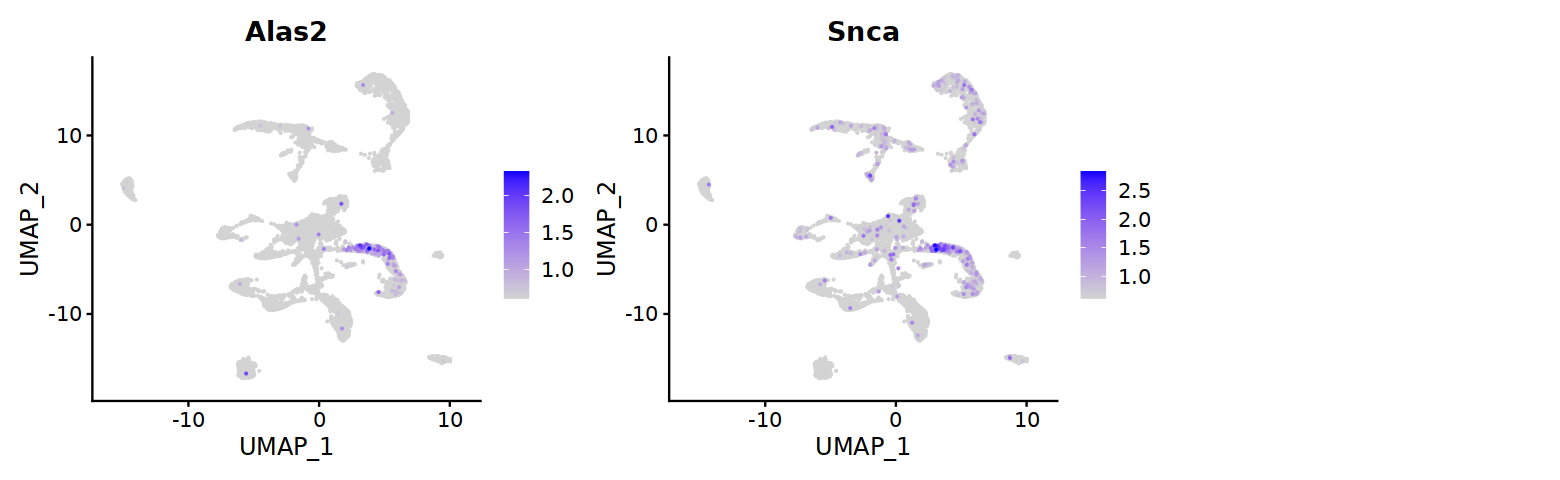

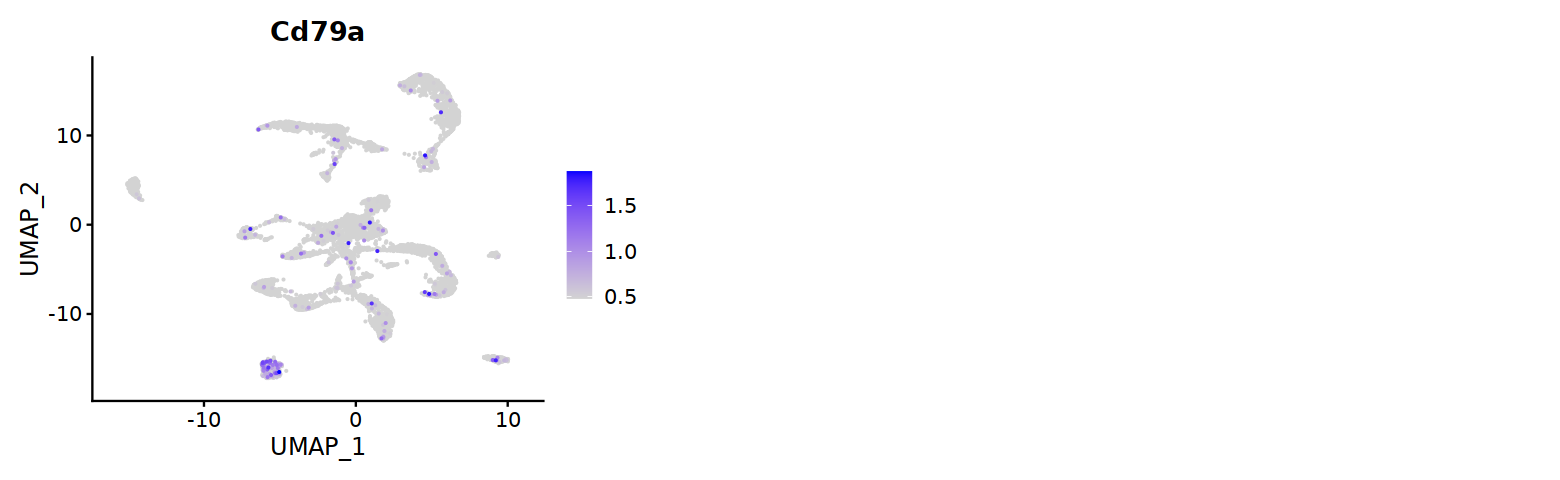

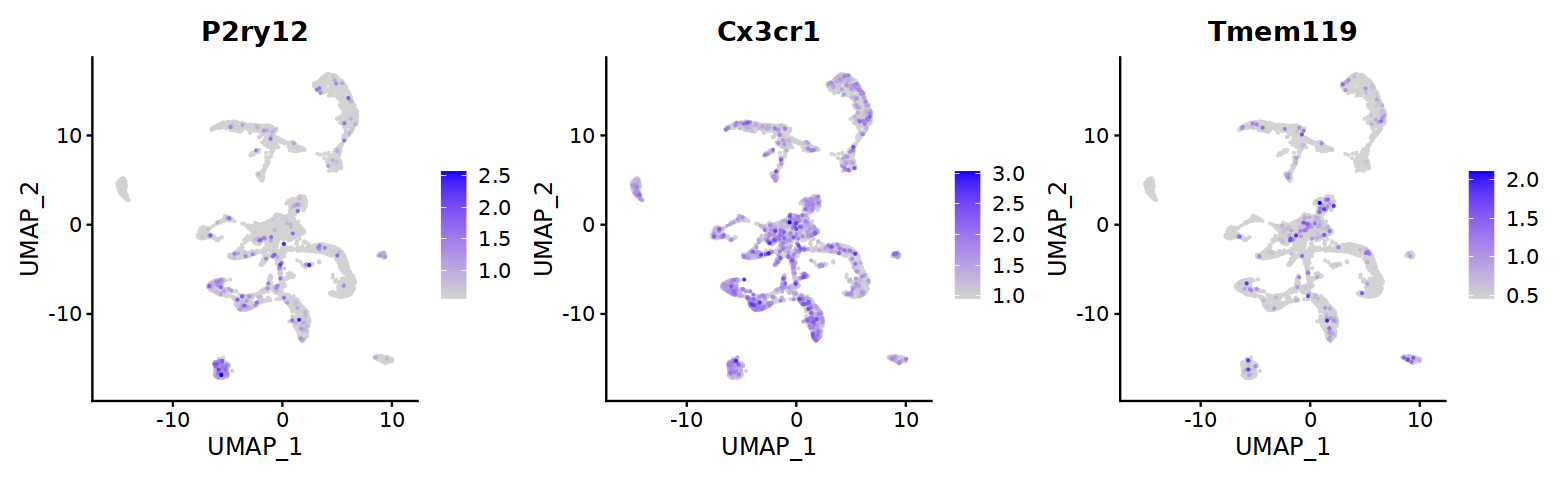

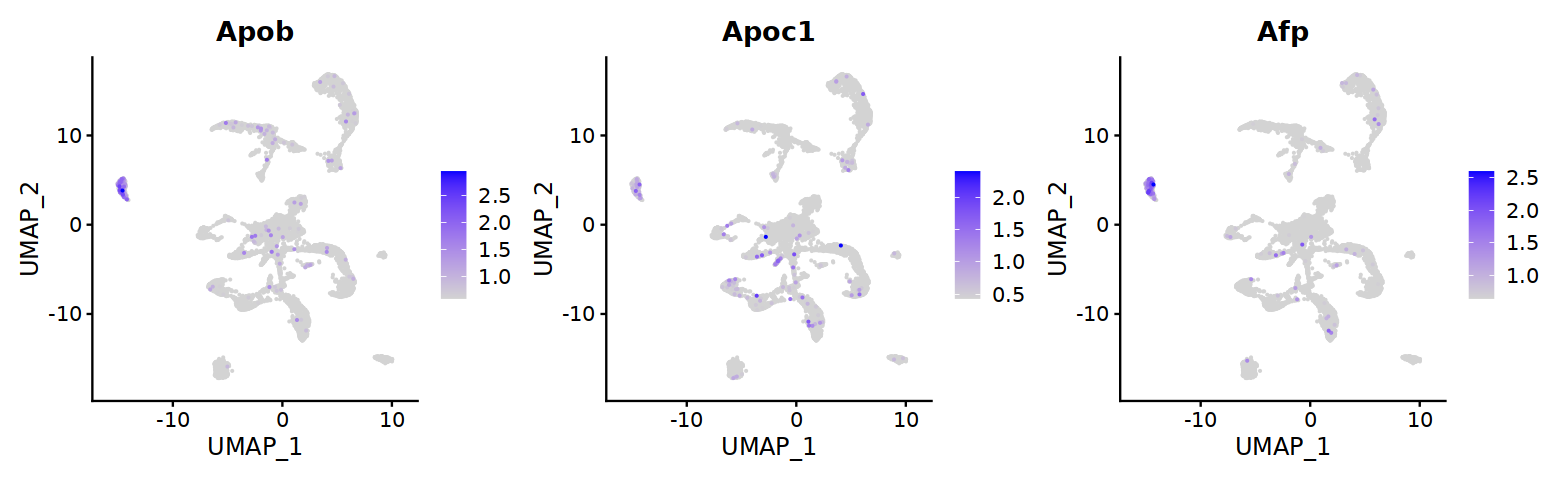

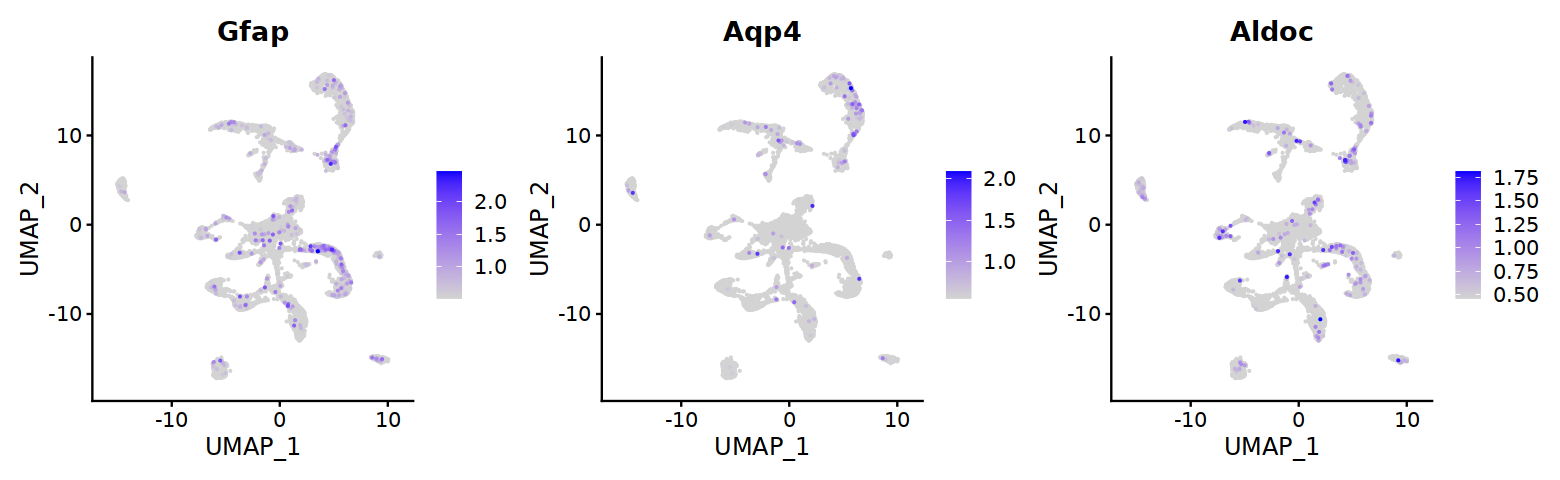

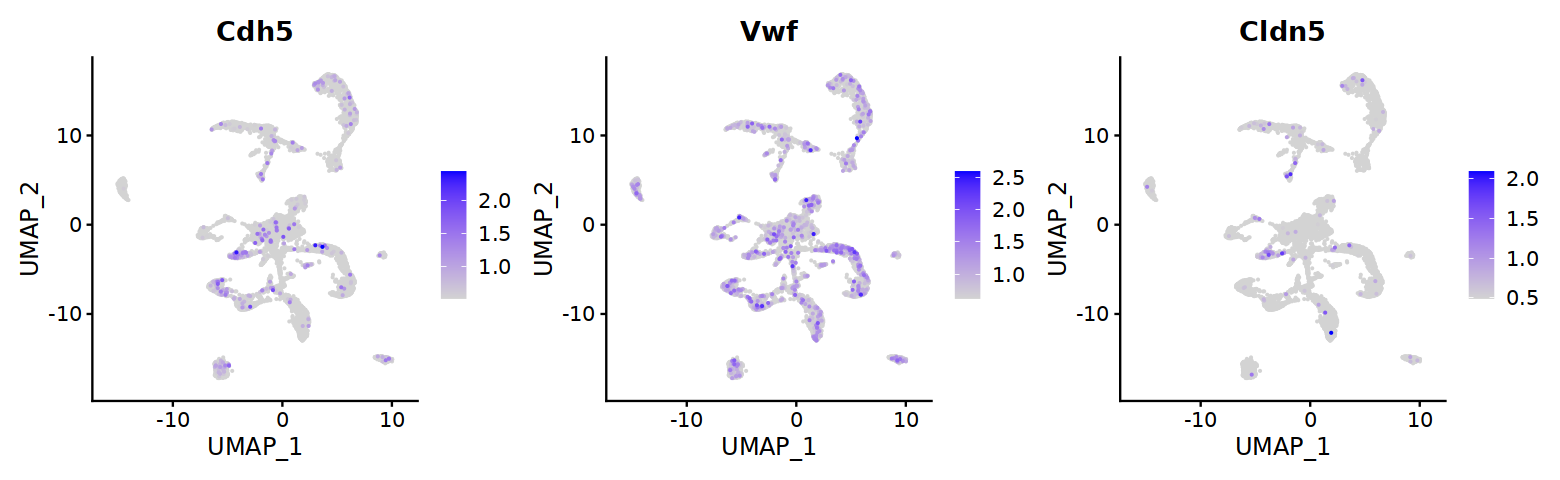

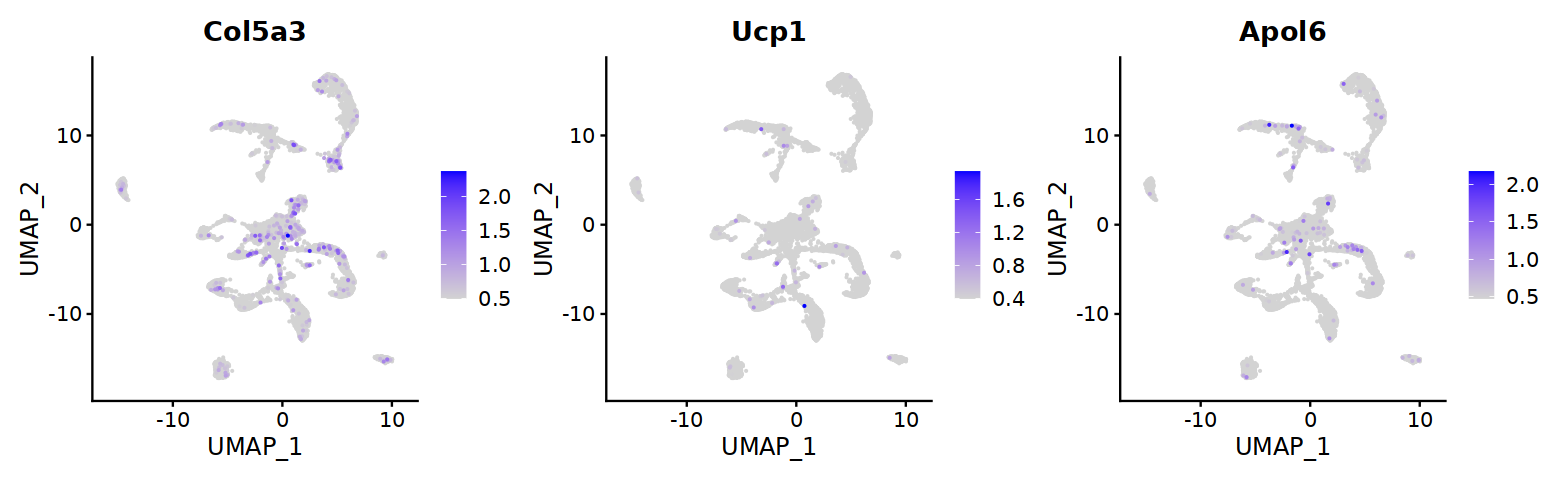

In [12]:
options(repr.plot.height = 4, repr.plot.width = 13)
DefaultAssay(data_seurat) <- "RNA"
# Neurons
FeaturePlot(object = data_seurat, features = c("Snap25","Grin1"), pt.size = 0.1, ncol=3, order = T,min.cutoff = "q50")
# Fibroblasts
FeaturePlot(object = data_seurat, features = c("Dcn","Col1a2","Col1a1"), pt.size = 0.1, ncol=3, order = T,min.cutoff = "q50")
# Erythrocytes
FeaturePlot(object = data_seurat, features = c("Alas2","Snca"), pt.size = 0.1, ncol=3, order = T,min.cutoff = "q50")
# B cells
FeaturePlot(object = data_seurat, features = c("Cd79a"), pt.size = 0.1, ncol=3, order = T,min.cutoff = "q50")
# Microglial cells
FeaturePlot(object = data_seurat, features = c("P2ry12","Cx3cr1","Tmem119"), pt.size = 0.1, ncol=3, order = T,min.cutoff = "q50")
# Hepatocytes
FeaturePlot(object = data_seurat, features = c("Apob","Apoc1","Afp"), pt.size = 0.1, ncol=3, order = T,min.cutoff = "q50")
# Astrocytes 效果不好
FeaturePlot(object = data_seurat, features = c("Gfap","Aqp4","Aldoc"), pt.size = 0.1, ncol=3,order = T,min.cutoff = "q50")
# endothelial cells 效果不好
FeaturePlot(object = data_seurat, features = c("Cdh5","Vwf","Cldn5"), pt.size = 0.1, ncol=3,order = T,min.cutoff = "q50")
# Adipocyte
FeaturePlot(object = data_seurat, features = c("Col5a3","Ucp1","Apol6"), pt.size = 0.1, ncol=3, order = T,min.cutoff = "q50")

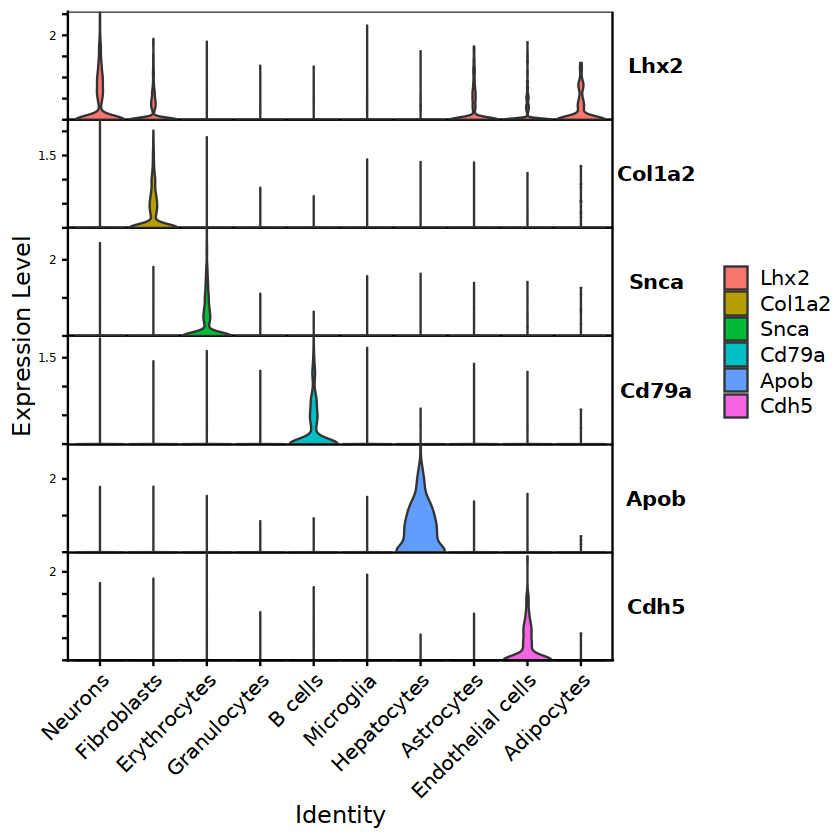

In [44]:
options(repr.plot.height = 7, repr.plot.width = 7)
VlnPlot(object = data_seurat, features = c("Lhx2","Col1a2","Snca","Cd79a","Apob","Cdh5"), pt.size = 0,stack = T,flip = T)
#VlnPlot(object = data_seurat, features = c("Snap25","Col1a2","Col1a1","Snca","Cd79a","Cx3cr1","Apob","Gfap","Cdh5", "Apol6"), pt.size = 0,stack = T,flip = T)

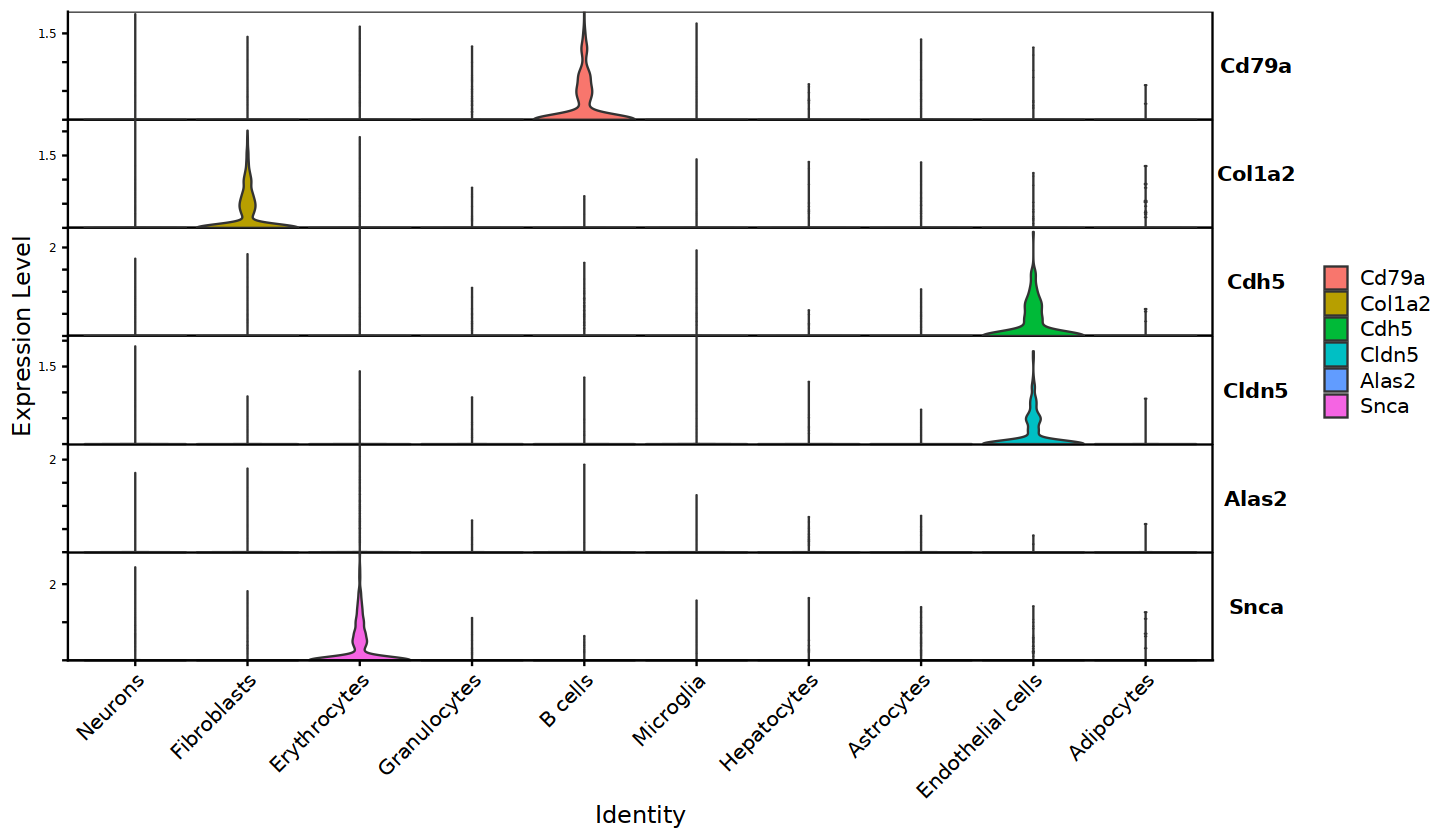

In [17]:
options(repr.plot.height = 7, repr.plot.width = 12)

VlnPlot(object = data_seurat, features = c("Cd79a","Col1a2","Cdh5","Cldn5","Alas2","Snca"), pt.size = 0, stack = T , flip = T)

In [3]:
# change back to working with peaks instead of gene activities
DefaultAssay(data_seurat) <- 'peaks'
da_peaks <- suppressWarnings(FindMarkers(object = data_seurat, ident.1 = "B cells", ident.2 = "Fibroblasts", test.use = 'LR', latent.vars = 'nCount_peaks',verbose = F))
head(da_peaks)

p_val         avg_log2FC pct.1 pct.2 p_val_adj   
chr4-137788358-137789290 9.004970e-105 6.247558   0.405 0.006 1.636473e-99
chr9-21625157-21626111   3.085765e-103 7.174150   0.383 0.003 5.607761e-98
chr2-173026446-173027333  9.540477e-97 6.165955   0.375 0.007 1.733791e-91
chr14-33189206-33190066   1.542912e-96 7.019972   0.359 0.003 2.803935e-91
chr2-144228453-144229372  6.480039e-92 6.236559   0.357 0.005 1.177618e-86
chr6-120567177-120568059  8.419335e-92 5.316040   0.386 0.012 1.530046e-86

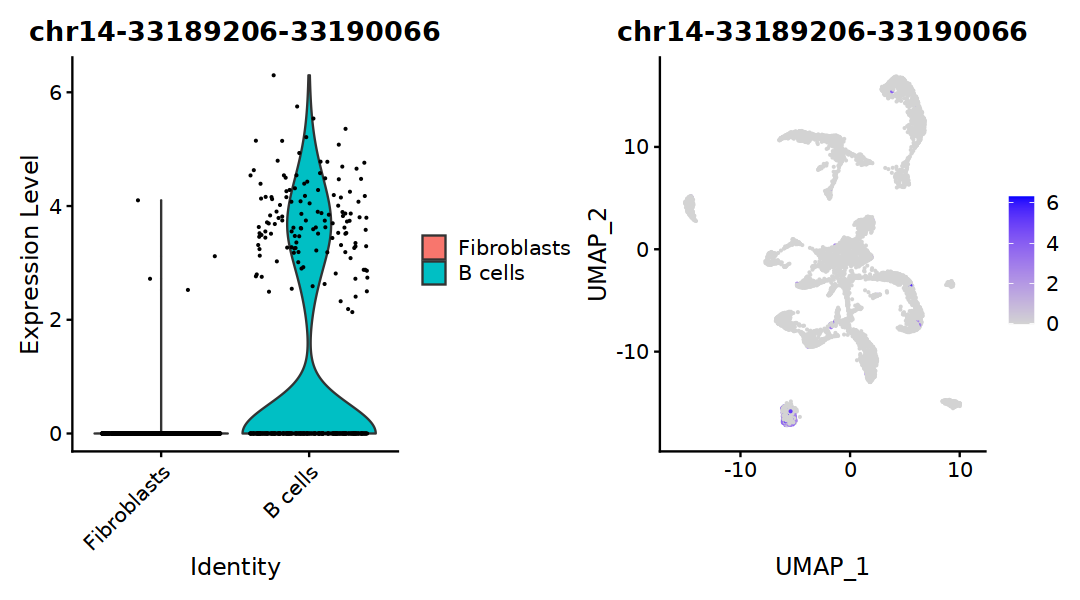

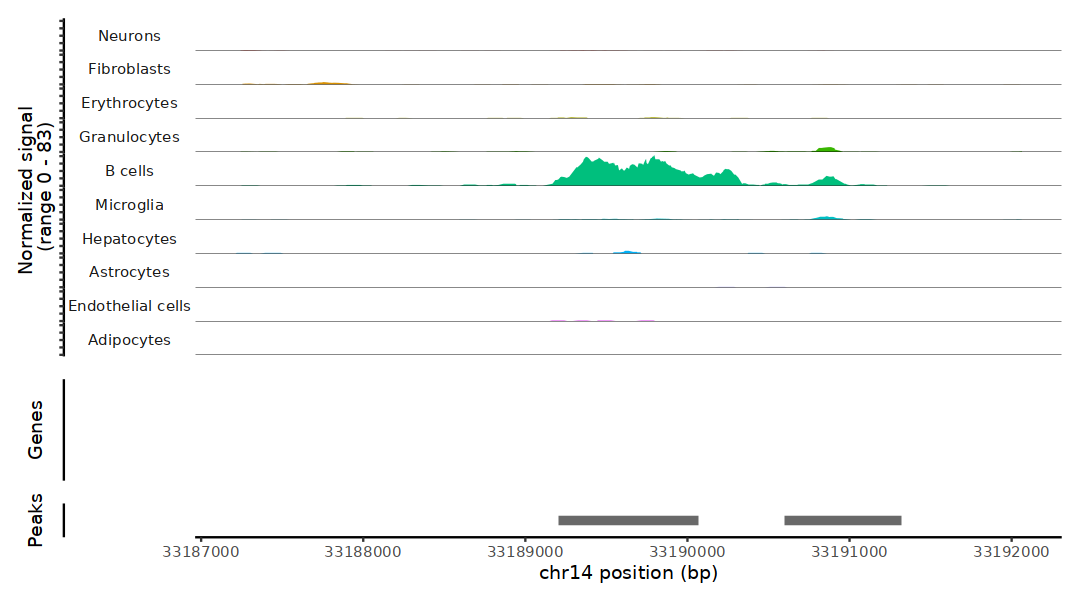

In [5]:
options(repr.plot.height = 5, repr.plot.width = 9)
# avg_log2FC to find Fibroblasts
plot1 <- VlnPlot(object = data_seurat, features = row.names(da_peaks[da_peaks$avg_log2FC>0, ])[4], pt.size = 0.1, idents = c("B cells","Fibroblasts"))
plot2 <- FeaturePlot(object = data_seurat, features = row.names(da_peaks[da_peaks$avg_log2FC>0, ])[4], pt.size = 0.1)
plot1 | plot2

# set plotting order
# levels(pbmc) <- c("CD4 Naive","CD4 Memory","CD8 Naive","CD8 effector","Double negative T cell","NK dim","pre-B cell",'B cell progenitor',"pDC","Dendritic cell","CD14+ Monocytes",'CD16+ Monocytes')

CoveragePlot(object = data_seurat, region = row.names(da_peaks[da_peaks$avg_log2FC>0, ])[4], extend.upstream = 2000, extend.downstream = 2000)

In [27]:
# change back to working with peaks instead of gene activities
DefaultAssay(data_seurat) <- 'RNA'
da_genes <- FindMarkers(object = data_seurat, ident.1 = "B cells", ident.2 = "Fibroblasts",verbose = F)
head(da_genes)

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
Inpp5d  1.844690e-149 1.2969134  0.721 0.100 4.022899e-145
Blnk    2.717706e-139 1.0009730  0.617 0.055 5.926773e-135
Laptm5  3.178239e-116 0.8991474  0.550 0.053 6.931104e-112
Jakmip1 3.507145e-103 1.0917046  0.649 0.141  7.648382e-99
Pou2af1 5.135954e-103 0.6141531  0.440 0.025  1.120049e-98
Selplg  7.703538e-103 0.6788452  0.461 0.033  1.679988e-98

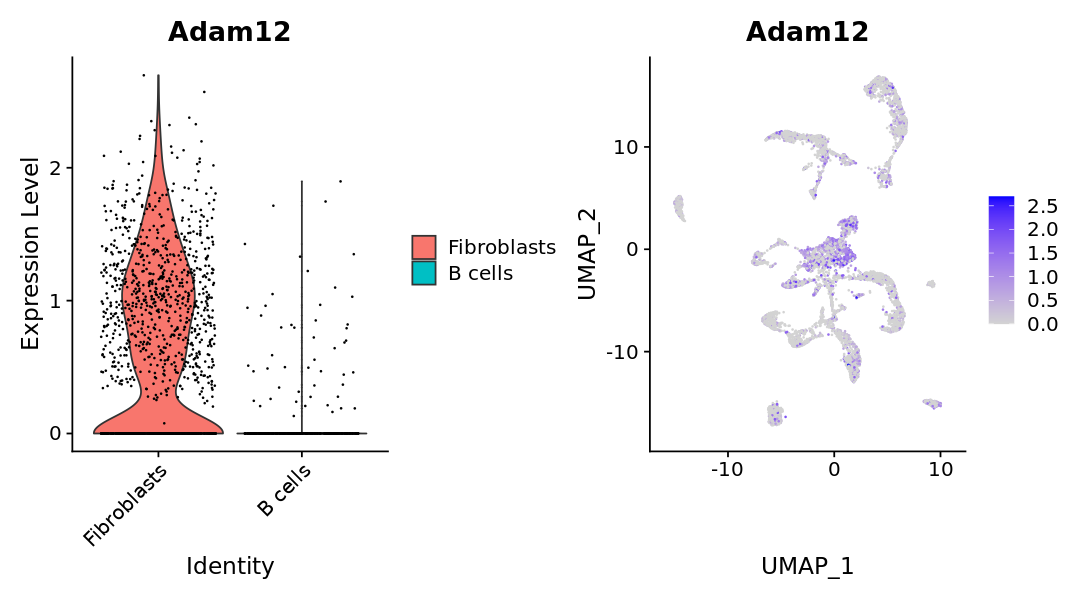

In [36]:
options(repr.plot.height = 5, repr.plot.width = 9)
# avg_log2FC to find Fibroblasts
# row.names(da_peaks[da_peaks$avg_log2FC>0, ])[4]   chr7-101393676-101394590
plot1 <- VlnPlot(object = data_seurat, features = row.names(da_genes[da_genes$avg_log2FC<0, ])[7], pt.size = 0.1, idents = c("B cells","Fibroblasts"))
plot2 <- FeaturePlot(object = data_seurat, features = row.names(da_genes[da_genes$avg_log2FC<0, ])[7], pt.size = 0.1)
plot1 | plot2

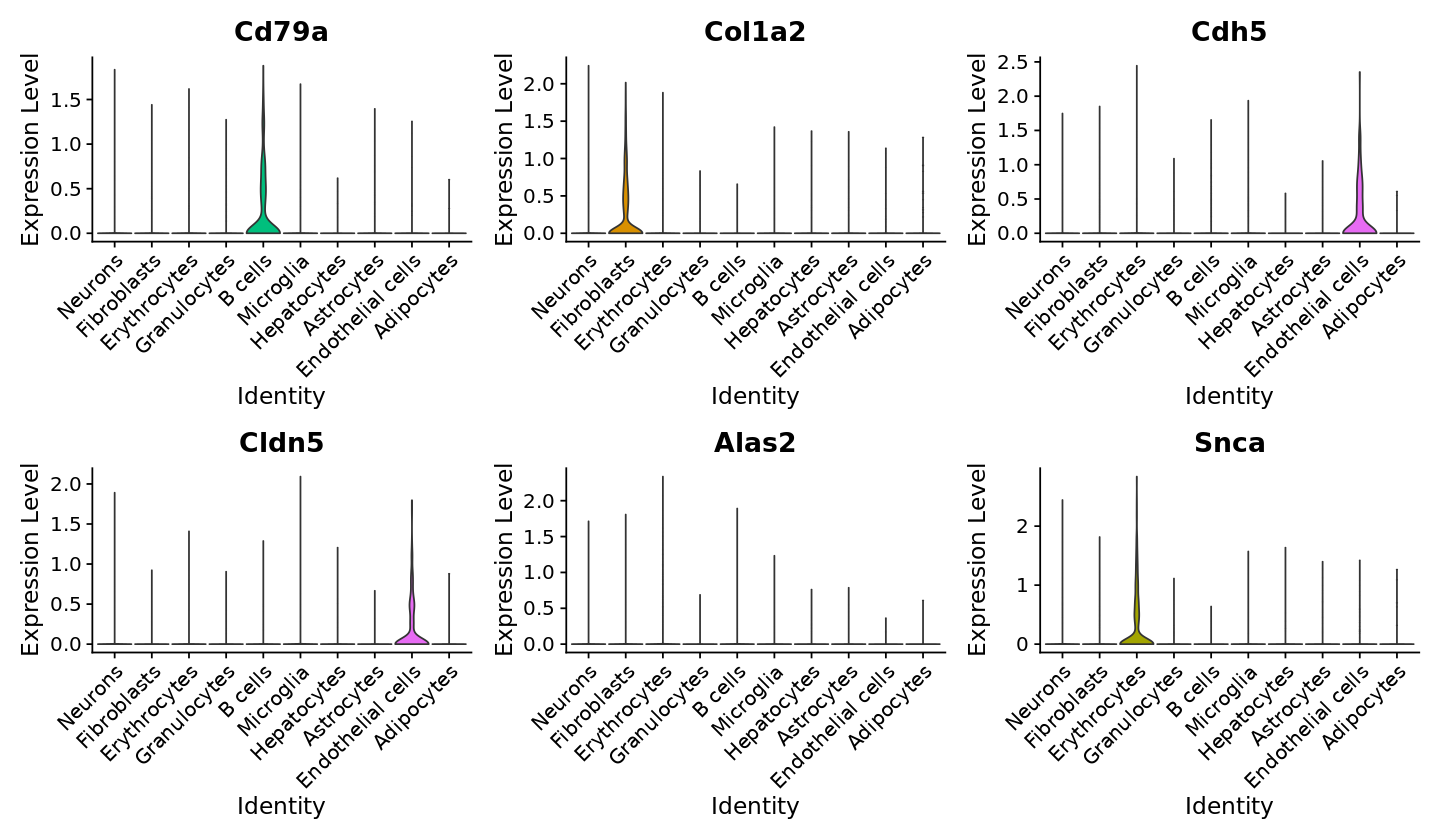

In [51]:
options(repr.plot.height = 7, repr.plot.width = 12)

VlnPlot(object = data_seurat, features = c("Cd79a","Col1a2","Cdh5","Cldn5","Alas2","Snca"), pt.size = 0)

Warning message:
"Could not find Snap25 in the default search locations, found in RNA assay instead"
Warning message:
"Could not find Grin1 in the default search locations, found in RNA assay instead"
Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: Syt1"
Warning message:
"Could not find P2ry12 in the default search locations, found in RNA assay instead"
Warning message:
"Could not find Cx3cr1 in the default search locations, found in RNA assay instead"
Warning message:
"Could not find Tmem119 in the default search locations, found in RNA assay instead"


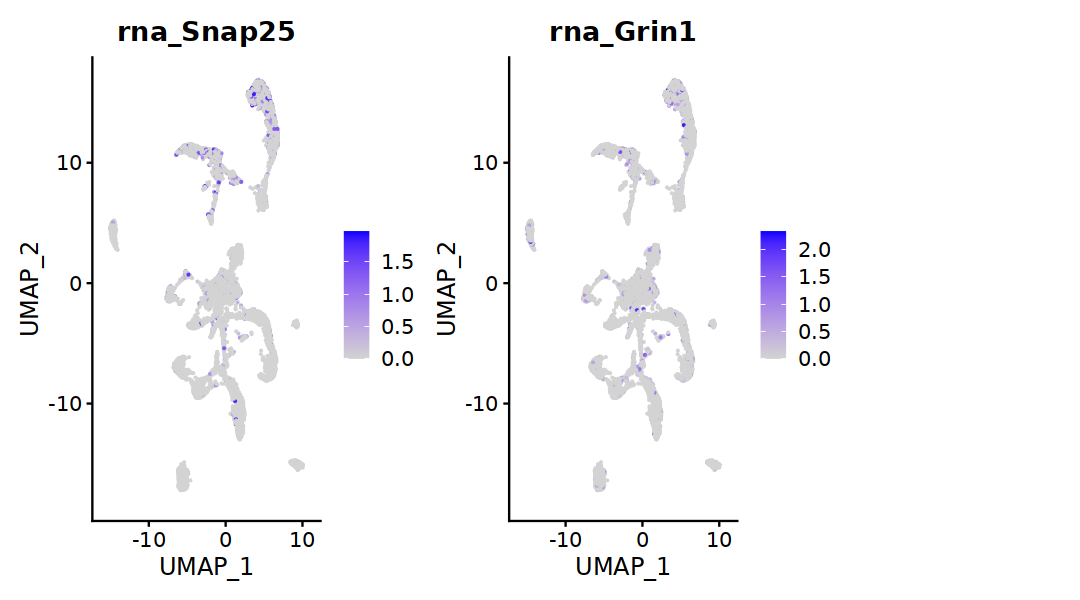

Warning message:
"Could not find Alb in the default search locations, found in RNA assay instead"
Warning message:
"Could not find Apob in the default search locations, found in RNA assay instead"
Warning message:
"Could not find Apoc1 in the default search locations, found in RNA assay instead"
Warning message:
"Could not find Hp in the default search locations, found in RNA assay instead"
Warning message:
"Could not find Afp in the default search locations, found in RNA assay instead"


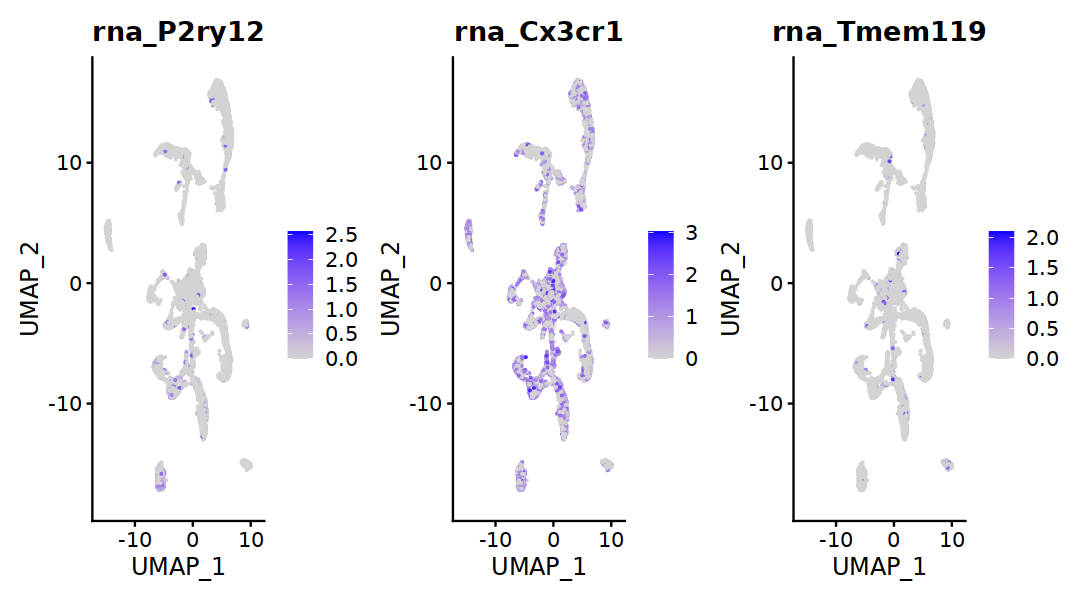

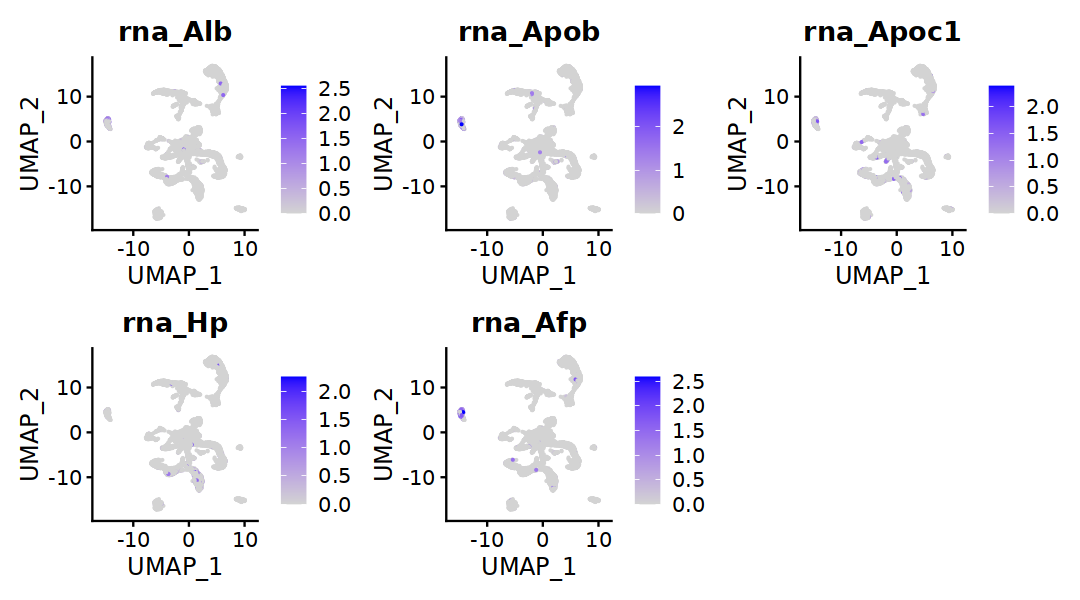

In [8]:
FeaturePlot(object = data_seurat, features = c("Syt1","Snap25","Grin1"), pt.size = 0.1, ncol=3)
FeaturePlot(object = data_seurat, features = c("P2ry12","Cx3cr1","Tmem119"), pt.size = 0.1, ncol=3)
FeaturePlot(object = data_seurat, features = c("Alb","Apob","Apoc1","Hp","Afp"), pt.size = 0.1, ncol=3)

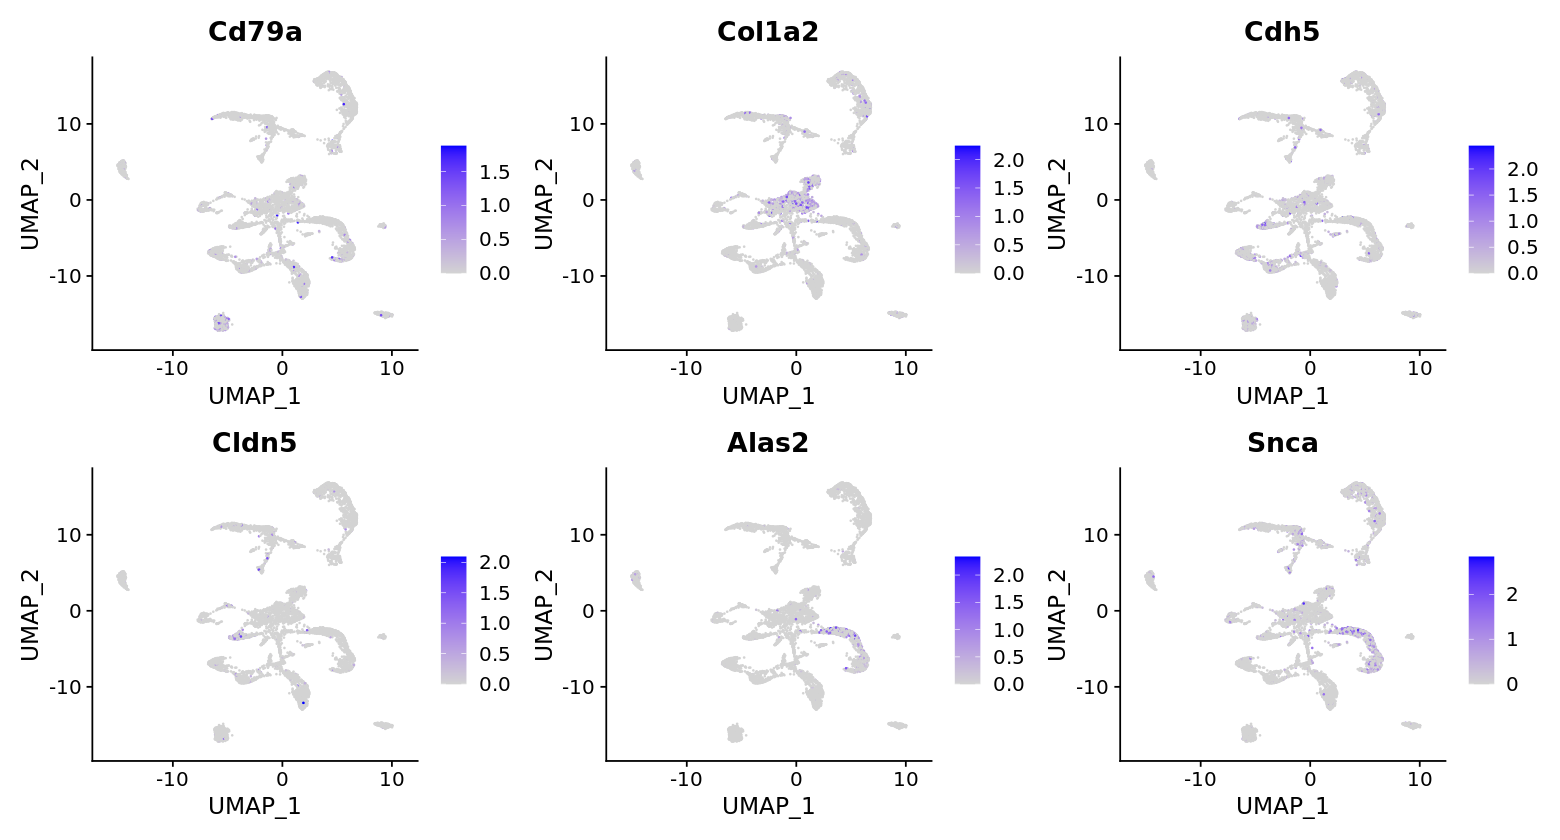

In [48]:
# BCells  Cd79a
# Fibroblasts   Col1a2,Col1a1
# Endothelial cells    Cldn5
# Erythrocytes    Alas2,Snca
options(repr.plot.height = 7, repr.plot.width = 13)
FeaturePlot(object = data_seurat, features = c("Cd79a","Col1a2","Cdh5","Cldn5","Alas2","Snca"), pt.size = 0.1, ncol=3)

In [ ]:
## cicero

In [1]:
suppressWarnings(suppressMessages({
    library(cicero)
    library(monocle3)
    library(Seurat)
    library(Signac)
    library(tidyverse)
    library(SingleR)
    library(GenomicRanges)
    library(Cairo)
}))

[1] 181730   7371

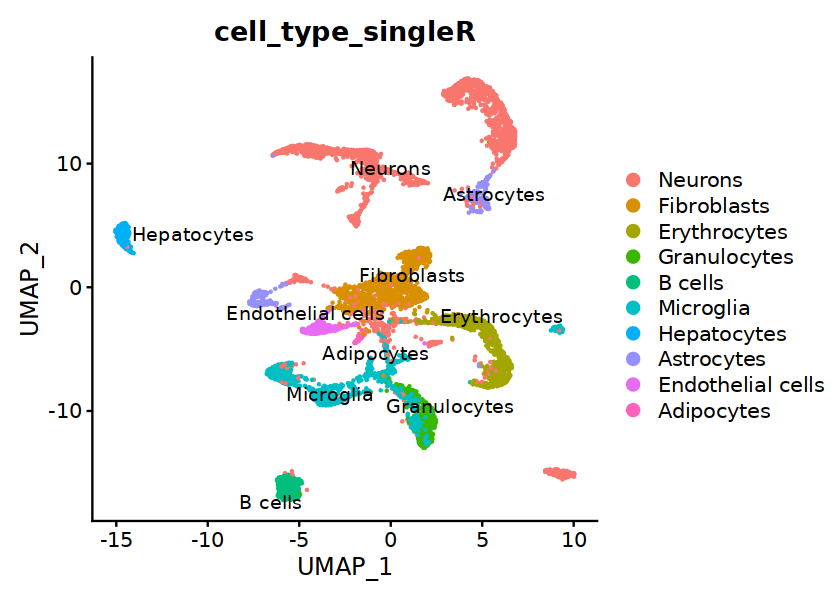

In [2]:
data_seurat <- readRDS("../data/2023-10-08_mouse_display/A0920_3_ME_YSPB_WX_D_T7_EDTA5030_outdir/mouse.rds")
dim(data_seurat)

options(repr.plot.height = 5, repr.plot.width = 7)
DimPlot(data_seurat, group.by = "cell_type_singleR",label = T,repel = T)

In [3]:
Pmat<-as.data.frame(as.matrix(data_seurat@assays$peaks@counts))
changepeak<-gsub(":|-","_",rownames(Pmat))
Pmat['peak'] <- changepeak
meltfile <- reshape2::melt(Pmat,id.vars='peak',value.name='count')
meltfile <- meltfile[meltfile$count >0,]
dim(meltfile)

[1] 24396853        3

In [4]:
umap_coords <- Embeddings(data_seurat,reduction = "umap")

input_cds <- make_atac_cds(meltfile, binarize = TRUE)
cicero_cds <- make_cicero_cds(input_cds, reduced_coordinates = umap_coords)

Overlap QC metrics:
Cells per bin: 50
Maximum shared cells bin-bin: 44
Mean shared cells bin-bin: 0.38741886599949
Median shared cells bin-bin: 0

Warning message in if (isSparseMatrix(counts)) {:
"the condition has length > 1 and only the first element will be used"


In [5]:
mm10_genome <- read.table("/SGRNJ01/Public/Database/ATAC/refdata-cellranger-atac-mm10-1.2.0/fasta/GENOME_SIZE.txt",sep="\t")

conns <- run_cicero(cicero_cds, mm10_genome) # Takes a few minutes to run
sum(is.na(conns$coaccess))
conns <- conns[!is.na(conns$coaccess),]
saveRDS(conns, "../data/2023-10-08_mouse_display/data/conns.rds")
dim(conns)
conns_plot <- conns[ conns$coaccess>0.25,]
dim(conns_plot)
head(conns_plot)

[1] "Starting Cicero"
[1] "Calculating distance_parameter value"
[1] "Running models"
[1] "Assembling connections"
[1] "Successful cicero models:  9487"
[1] "Other models: "

Zero or one element in range 
                        1474 
[1] "Models with errors:  0"
[1] "Done"


[1] 243370

[1] 15128572        3

[1] 317712      3

Peak1                     Peak2                     coaccess 
70  chr10_100015459_100016285 chr10_100131459_100132275 0.2638453
403 chr10_100065610_100066537 chr10_100115407_100116247 0.2661149
485 chr10_100115407_100116247 chr10_100065610_100066537 0.2661149
493 chr10_100115407_100116247 chr10_100155464_100156332 0.3468142
603 chr10_100131459_100132275 chr10_100015459_100016285 0.2638453
739 chr10_100155464_100156332 chr10_100115407_100116247 0.3468142

In [ ]:
## cicero plot

In [1]:
suppressWarnings(suppressMessages({
    library(cicero)
    library(monocle3)
    library(Seurat)
    library(Signac)
    library(tidyverse)
    library(SingleR)
    library(GenomicRanges)
    library(Cairo)
}))

In [2]:
conns <- readRDS("../data/2023-10-08_mouse_display/data/conns.rds")
dim(conns)
conns_plot <- conns[ conns$coaccess>0.25,]
dim(conns_plot)

# conns stat --
conns_range <- GRanges(seqnames = word(conns_plot$Peak1,1,sep=fixed("_")),
                       ranges = IRanges(start = as.numeric(word(conns_plot$Peak1, 2, sep=fixed("_"))),
                                        end = as.numeric(word(conns_plot$Peak1, 3, sep=fixed("_")))),
                       strand = rep("+", nrow(conns_plot)))

mm10_genome <- read.table("/SGRNJ01/Public/Database/ATAC/refdata-cellranger-atac-mm10-1.2.0/fasta/GENOME_SIZE.txt",sep="\t")

window_length <- 2*10^5
window_count <- ceiling(sapply(sort(as.character(unique(mm10_genome$V1))), function(x){ as.numeric(mm10_genome$V2[ mm10_genome$V1 == x])})/window_length)


window_region <- GRanges(seqnames = rep(names(window_count), as.numeric(window_count)),
                         ranges = IRanges(start = unlist(sapply(window_count,function(x){
                                          return(seq(0, (as.numeric(x)-1) * window_length, window_length))})),
                                          end = unlist(sapply(window_count,function(x){
                                          return(seq(window_length - 1, as.numeric(x) * window_length - 1, window_length))}))),
                         strand = "+")

# 对每个window_region进行统计
window_count <- do.call(cbind,lapply(1:length(window_region), function(x){
    countOverlaps(conns_range, window_region[x])
}))
window_region_df <- as.data.frame(window_region)                          
res <- data.frame(region = paste0(window_region_df$seqnames, ': ', window_region_df$start, '-', window_region_df$end),
                  count = colSums(window_count)) # colSums 获取每个window_region的count数

# 
gene_anno <- rtracklayer::readGFF("/SGRNJ/Public/Database/ATAC/refdata-cellranger-atac-mm10-1.2.0/genes/genes.gtf")
#gene_anno$chromosome <- paste0("chr", gene_anno$seqid)
gene_anno$chromosome <- gene_anno$seqid
gene_anno$gene <- gene_anno$gene_id
gene_anno$transcript <- gene_anno$transcript_id
gene_anno$symbol <- gene_anno$gene_name

[1] 15128572        3

[1] 317712      3

In [3]:
function_plot_connections <- function(i, upstream=20000, downstream=30000){
    plot_connections(conns, word(conns_plot$Peak1[i], 1, sep=fixed("_")), 
                 as.numeric(word(conns_plot$Peak1[i], 2, sep=fixed("_"))) - upstream, 
                 as.numeric(word(conns_plot$Peak1[i], 3, sep=fixed("_"))) + downstream, 
                 gene_model = gene_anno, 
                 coaccess_cutoff = .25, 
                 connection_width = .5, 
                 collapseTranscripts = "longest" )
}

function_plot_connections_update <- function(chr, start, end){
    plot_connections(conns, chr = chr, minbp = start, maxbp = end, 
                 gene_model = gene_anno, 
                 coaccess_cutoff = .25, 
                 connection_width = .5, 
                 collapseTranscripts = "longest" )
}

png 
  2

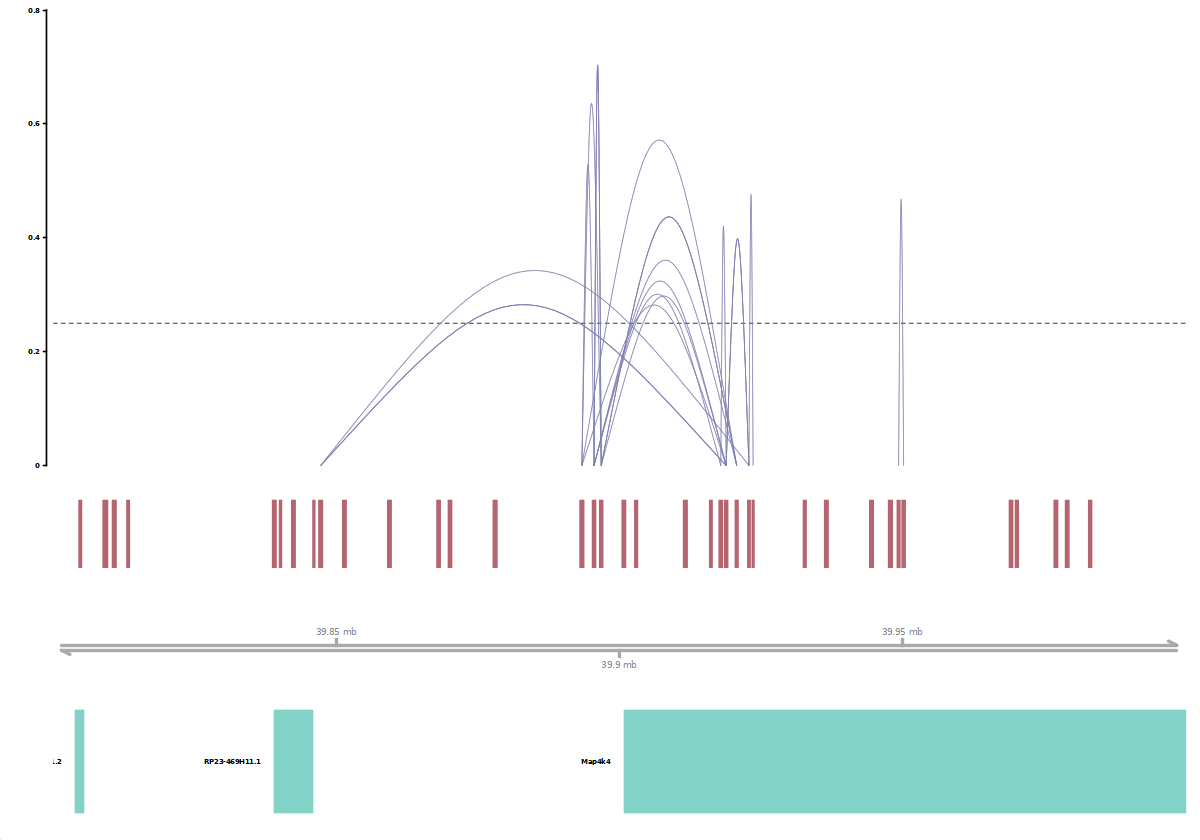

Cairo 
    3

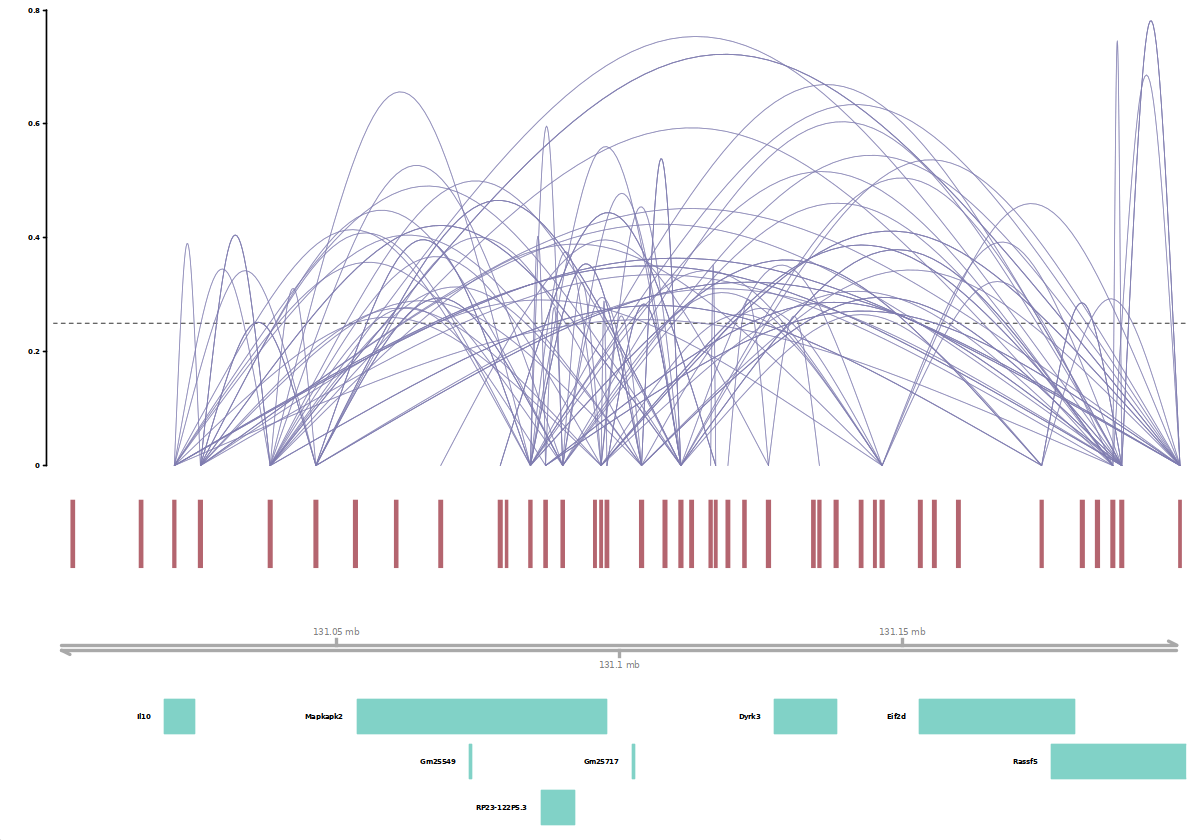

In [4]:
options(repr.plot.height = 7, repr.plot.width = 10)
CairoPDF("../data/2023-10-08_mouse_display/outdir/connections_chr1_39800000_39999999.pdf",width = 10,height = 7)
function_plot_connections_update("chr1", 39800000, 39999999)
dev.off()

options(repr.plot.height = 7, repr.plot.width = 10)
CairoPDF("../data/2023-10-08_mouse_display/outdir/connections_chr1_131000000_131199999.pdf",width = 10,height = 7)
function_plot_connections_update("chr1",  131000000, 131199999)
dev.off()

In [ ]:
# subset
data_seurat <- subset(data_seurat, subset = peak_region_fragments > 3000 & 
                                            peak_region_fragments < 100000 & 
                                            pct_reads_in_peaks > 40 & 
                                            blacklist_ratio < 0.025 & 
                                            nucleosome_signal < 4 & 
                                            TSS.enrichment > 2)
dim(data_seurat)

function_clustering <- function(data){
    data <- data %>% 
        RunTFIDF(verbose = F) %>%
        FindTopFeatures(min.cutoff = 'q0', verbose = F) %>%
        RunSVD(verbose = F) %>%
        RunUMAP(reduction = 'lsi', dims = 2:30, verbose = F) %>%
        FindNeighbors(reduction = 'lsi', dims = 2:30, verbose = F) %>%
        FindClusters(algorithm = 3, resolution = 0.8, verbose = FALSE)

    gene.activities <- GeneActivity(data)  # compute gene activities
    data[['RNA']] <- CreateAssayObject(counts = gene.activities)  # add the gene activity matrix to the Seurat object as a new assay
    data <- NormalizeData(object = data, assay = 'RNA', normalization.method = 'LogNormalize', scale.factor = median(data$nCount_RNA))
    return(data)
}

function_singleR <- function(data, species, resolution){
    if(species == "human"){
        ref = readRDS("/SGRNJ03/randd/user/wangjingshen/share/singleR_ref_rds/HumanPrimaryCellAtlasData.rds")
    }
    if(species == "mouse"){
        ref = readRDS("/SGRNJ03/randd/user/wangjingshen/share/singleR_ref_rds/MouseRNAseqData.rds")
    }

    anno <- SingleR(test = data@assays$RNA@data, ref = ref, 
                    clusters = unlist(data@meta.data[[paste0("peaks_snn_res.", resolution)]]),
                    assay.type.test=1, labels = ref$label.main)
    data$cell_type_singleR <- plyr::mapvalues(x = data@meta.data[[paste0("peaks_snn_res.", resolution)]], from = row.names(anno), to = anno$labels)
    return(data)
}

data_seurat <- function_clustering(data_seurat)
data_seurat <- function_singleR(data_seurat, "mouse", 0.8)

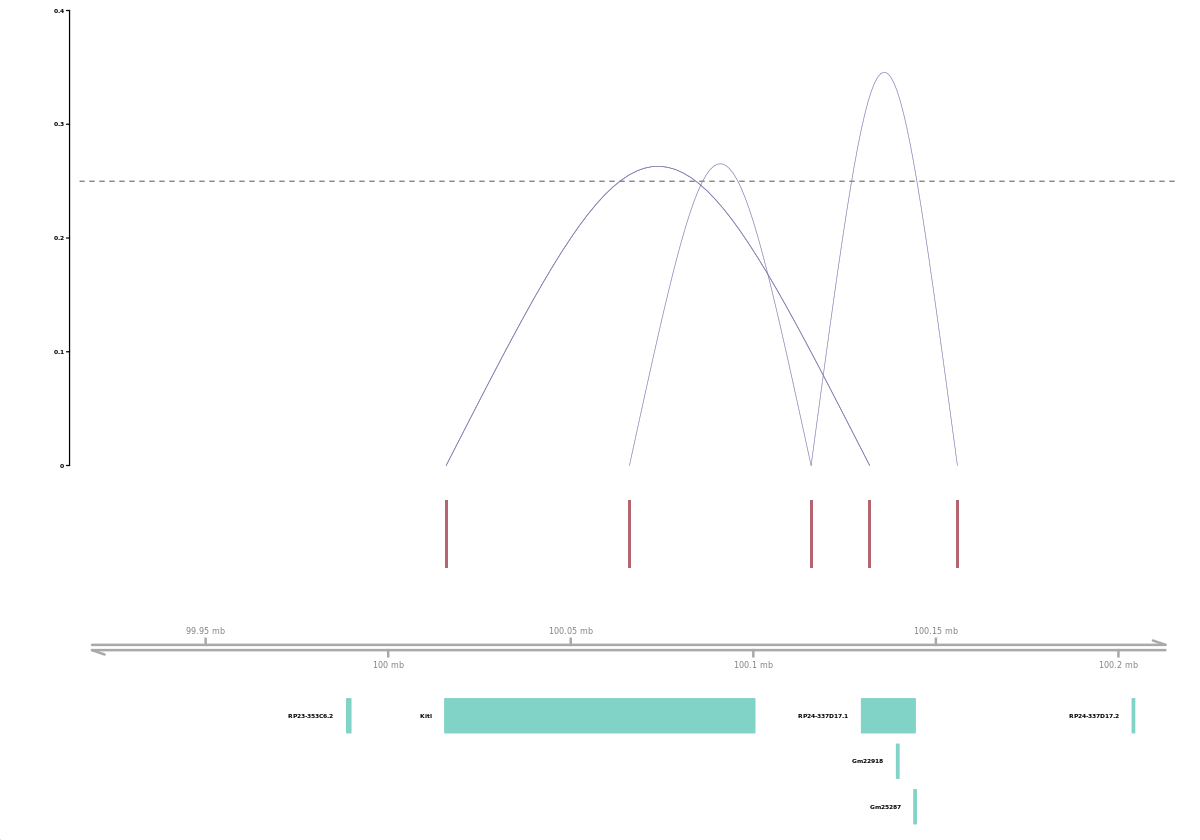

In [22]:
options(repr.plot.height = 7, repr.plot.width = 10)
function_plot_connections(1,100000,200000)

In [21]:
function_plot_connections <- function(i, upstream=20000, downstream=30000){
    plot_connections(conns_plot, word(conns_plot$Peak1[i], 1, sep=fixed("_")), 
                 as.numeric(word(conns_plot$Peak1[i], 2, sep=fixed("_"))) - upstream, 
                 as.numeric(word(conns_plot$Peak1[i], 3, sep=fixed("_"))) + downstream, 
                 gene_model = gene_anno, 
                 coaccess_cutoff = .25, 
                 connection_width = .5, 
                 collapseTranscripts = "longest" )
}

In [1]:
suppressWarnings(suppressMessages({
    library(Signac)
    library(Seurat)
    library(EnsDb.Mmusculus.v79)
    library(tidyverse)
    library(SingleR)
}))
set.seed(1)
color_protocol <- c("#0067AA","#FF7F00","#00A23F","#FF1F1D","#A763AC","#B45B5D","#FF8AB6","#B6B800","#01C1CC","#85D5F8","#FFC981","#C8571B","#727272","#EFC800","#8A5626","#502E91","#59A4CE","#344B2B","#FBE29D","#FDD6E6","#849C8C","#F07C6F","#000101")

[1] 181730   7371

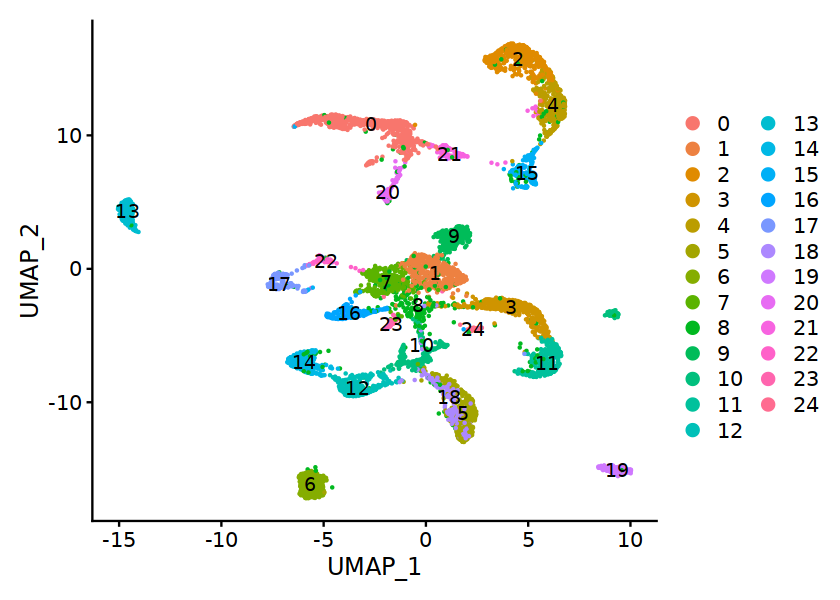

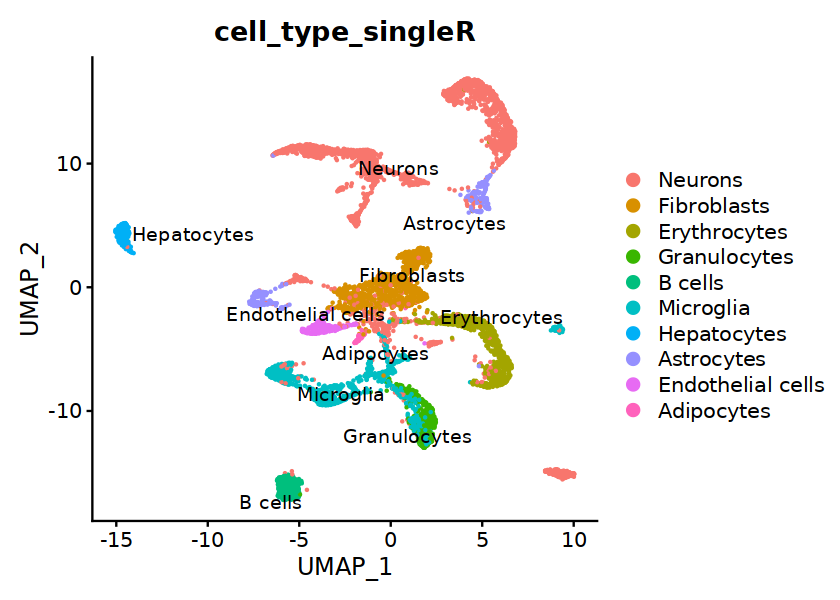

In [2]:
data_seurat <- readRDS("../data/2023-10-08_mouse_display/A0920_3_ME_YSPB_WX_D_T7_EDTA5030_outdir/mouse.rds")
dim(data_seurat)

options(repr.plot.height = 5, repr.plot.width = 7)
DimPlot(data_seurat,label = T)

options(repr.plot.height = 5, repr.plot.width = 7)
DimPlot(data_seurat, group.by = "cell_type_singleR",label = T,repel = T)

Idents(data_seurat) <- data_seurat$cell_type_singleR

Warning message:
"Removed 4 rows containing missing values (`geom_segment()`)."


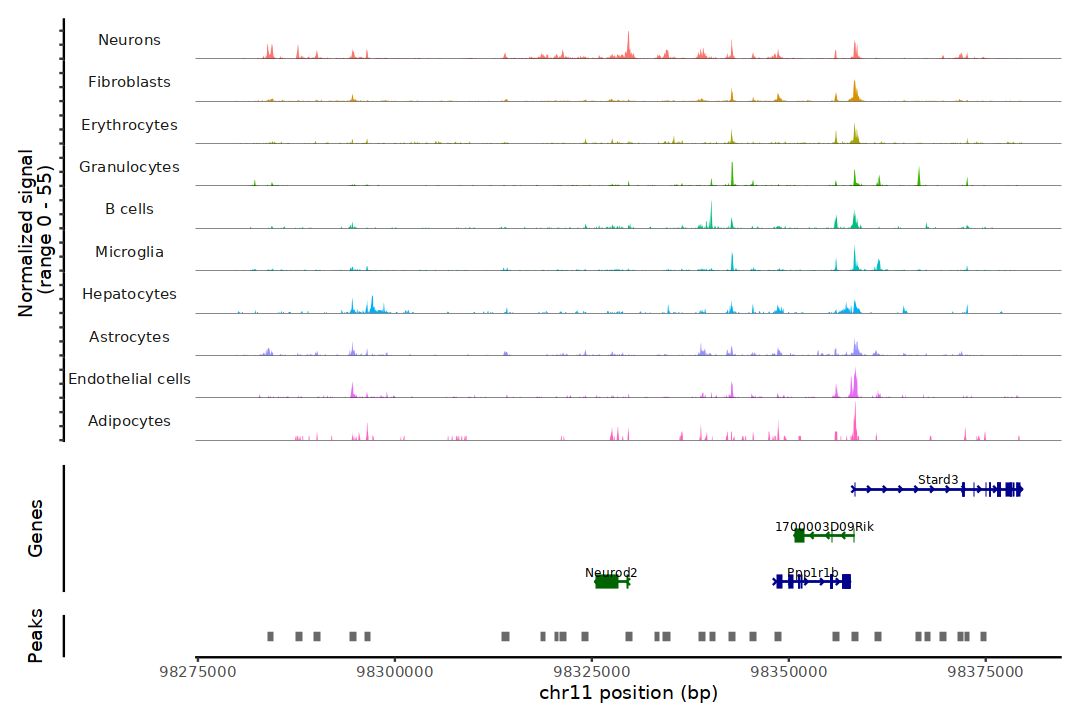

Warning message:
"Removed 31 rows containing missing values (`geom_segment()`)."


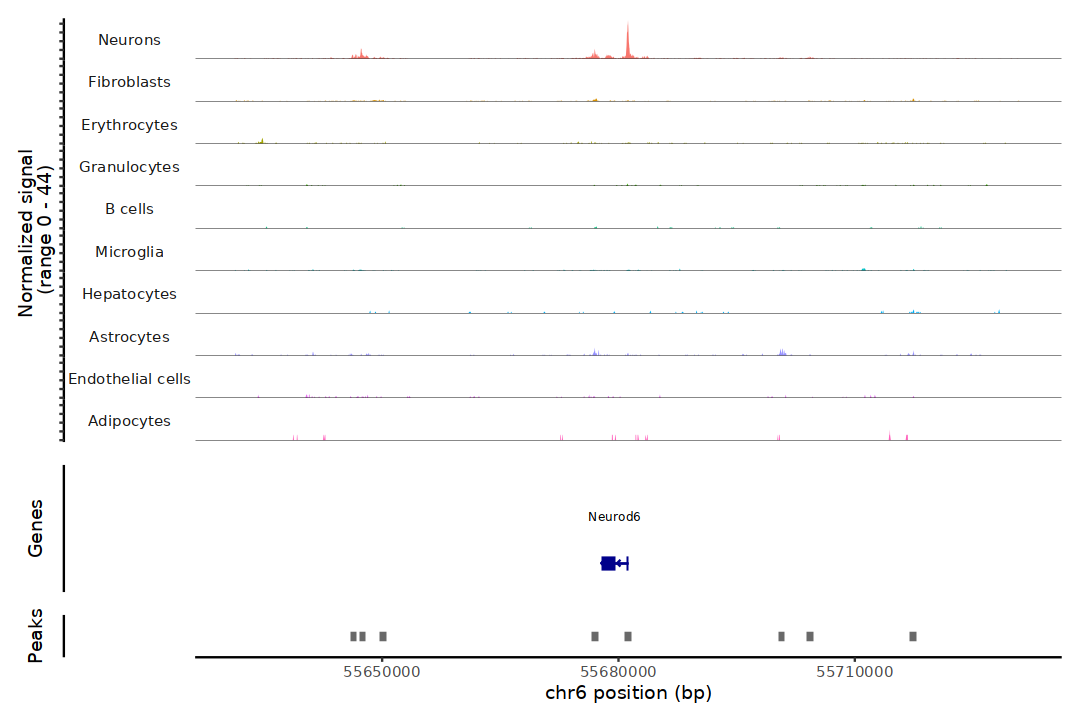

Warning message:
"Removed 4 rows containing missing values (`geom_segment()`)."


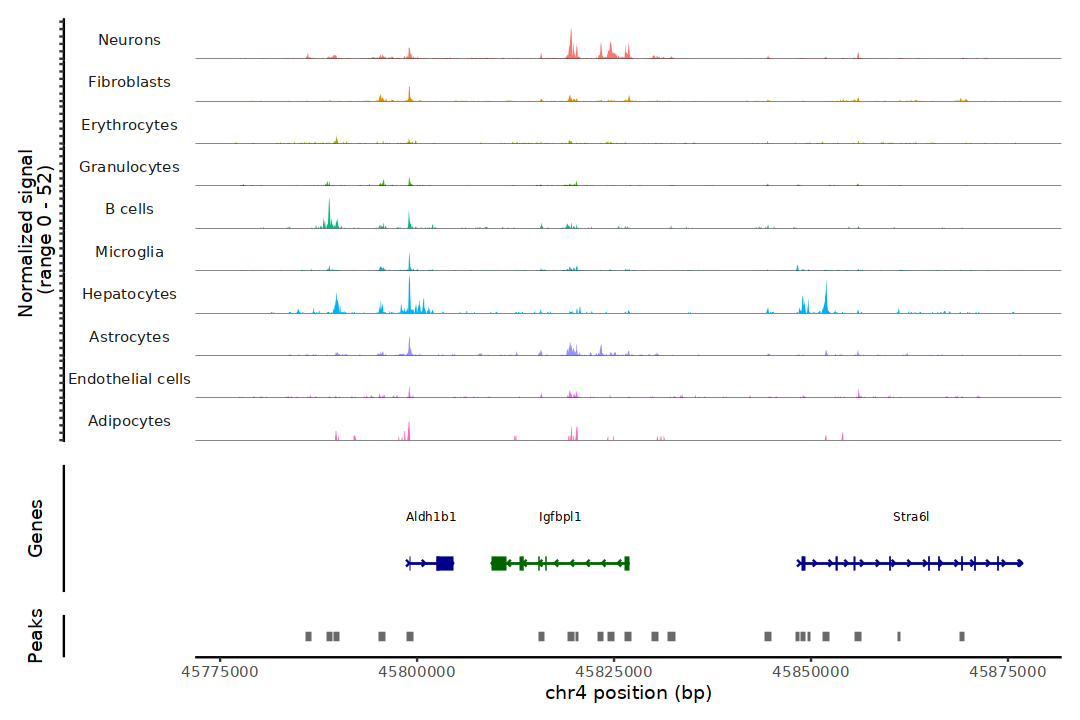

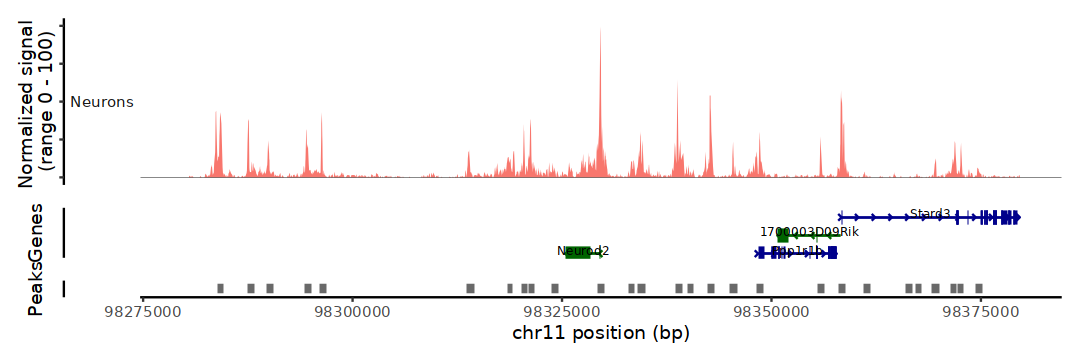

Warning message:
"Removed 31 rows containing missing values (`geom_segment()`)."


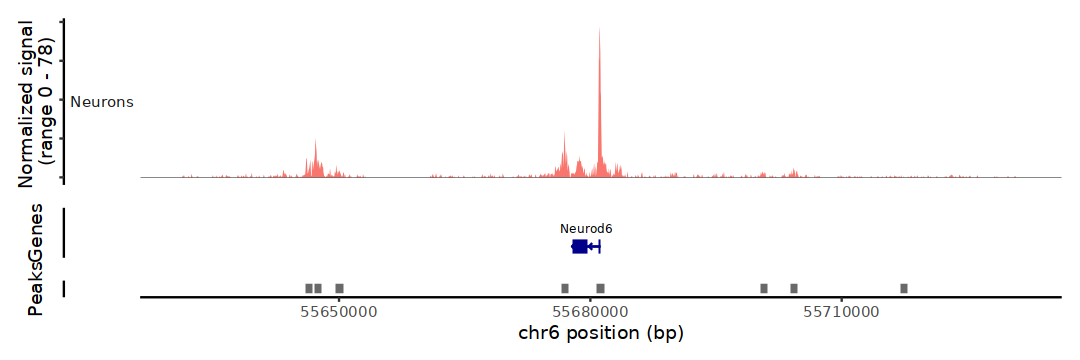

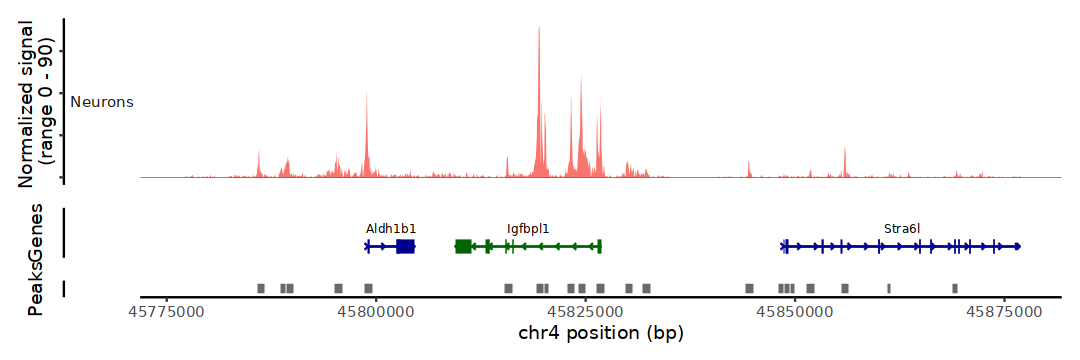

In [3]:
options(repr.plot.height = 6, repr.plot.width = 9)
CoveragePlot(object = data_seurat, region = "chr11-98279644-98379645", extend.upstream = 0, extend.downstream = 0)
CoveragePlot(object = data_seurat, region = "chr6-55631262-55731263", extend.upstream = 0, extend.downstream = 0)
CoveragePlot(object = data_seurat, region = "chr4-45776826-45876827", extend.upstream = 0, extend.downstream = 0)

data_neurons <- subset(data_seurat, subset = cell_type_singleR == "Neurons")
options(repr.plot.height = 3, repr.plot.width = 9)
CoveragePlot(object = data_neurons, region = "chr11-98279644-98379645", extend.upstream = 0, extend.downstream = 0)
CoveragePlot(object = data_neurons, region = "chr6-55631262-55731263", extend.upstream = 0, extend.downstream = 0)
CoveragePlot(object = data_neurons, region = "chr4-45776826-45876827", extend.upstream = 0, extend.downstream = 0)

In [ ]:
## neurons cicero

[1] 181730   7371

[1] 6789472       3

Overlap QC metrics:
Cells per bin: 50
Maximum shared cells bin-bin: 44
Mean shared cells bin-bin: 1.14408801427346
Median shared cells bin-bin: 0

Warning message in if (isSparseMatrix(counts)) {:
"the condition has length > 1 and only the first element will be used"


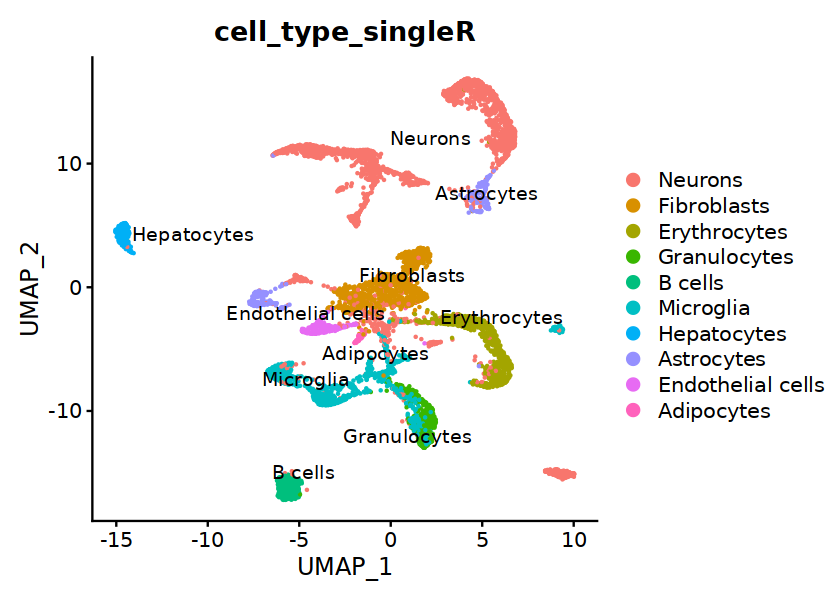

In [1]:
suppressWarnings(suppressMessages({
    library(cicero)
    library(monocle3)
    library(Seurat)
    library(Signac)
    library(tidyverse)
    library(SingleR)
    library(GenomicRanges)
    library(Cairo)
}))

data_seurat <- readRDS("../data/2023-10-08_mouse_display/A0920_3_ME_YSPB_WX_D_T7_EDTA5030_outdir/mouse.rds")
dim(data_seurat)

options(repr.plot.height = 5, repr.plot.width = 7)
DimPlot(data_seurat, group.by = "cell_type_singleR",label = T,repel = T)

data_neurons <- subset(data_seurat, subset = cell_type_singleR == "Neurons")



Pmat<-as.data.frame(as.matrix(data_neurons@assays$peaks@counts))
changepeak<-gsub(":|-","_",rownames(Pmat))
Pmat['peak'] <- changepeak
meltfile <- reshape2::melt(Pmat,id.vars='peak',value.name='count')
meltfile <- meltfile[meltfile$count >0,]
dim(meltfile)

umap_coords <- Embeddings(data_neurons,reduction = "umap")

input_cds <- make_atac_cds(meltfile, binarize = TRUE)
cicero_cds <- make_cicero_cds(input_cds, reduced_coordinates = umap_coords)

In [2]:
mm10_genome <- read.table("/SGRNJ01/Public/Database/ATAC/refdata-cellranger-atac-mm10-1.2.0/fasta/GENOME_SIZE.txt",sep="\t")

conns <- run_cicero(cicero_cds, mm10_genome) # Takes a few minutes to run
sum(is.na(conns$coaccess))
conns <- conns[!is.na(conns$coaccess),]
saveRDS(conns, "../data/2023-10-08_mouse_display/data/conns_neurons.rds")
dim(conns)
conns_plot <- conns[ conns$coaccess>0.25,]
dim(conns_plot)
head(conns_plot)

# 
gene_anno <- rtracklayer::readGFF("/SGRNJ/Public/Database/ATAC/refdata-cellranger-atac-mm10-1.2.0/genes/genes.gtf")
#gene_anno$chromosome <- paste0("chr", gene_anno$seqid)
gene_anno$chromosome <- gene_anno$seqid
gene_anno$gene <- gene_anno$gene_id
gene_anno$transcript <- gene_anno$transcript_id
gene_anno$symbol <- gene_anno$gene_name

[1] "Starting Cicero"
[1] "Calculating distance_parameter value"
[1] "Running models"
[1] "Assembling connections"
[1] "Successful cicero models:  9481"
[1] "Other models: "

Zero or one element in range 
                        1480 
[1] "Models with errors:  0"
[1] "Done"


[1] 297798

[1] 14875080        3

[1] 119418      3

Peak1                     Peak2                     coaccess 
46   chr10_100015459_100016285 chr10_99900939_99901799   0.3243075
99   chr10_100019167_100020008 chr10_100052445_100053275 0.3370410
216  chr10_100052445_100053275 chr10_100019167_100020008 0.3370410
1227 chr10_100603252_100603929 chr10_100604102_100604931 0.4531377
1251 chr10_100604102_100604931 chr10_100603252_100603929 0.4531377
1435 chr10_100740906_100741684 chr10_100741853_100742668 0.3754215

In [3]:
function_plot_connections <- function(i, upstream=20000, downstream=30000){
    plot_connections(conns, word(conns_plot$Peak1[i], 1, sep=fixed("_")), 
                 as.numeric(word(conns_plot$Peak1[i], 2, sep=fixed("_"))) - upstream, 
                 as.numeric(word(conns_plot$Peak1[i], 3, sep=fixed("_"))) + downstream, 
                 gene_model = gene_anno, 
                 coaccess_cutoff = .25, 
                 connection_width = .5, 
                 collapseTranscripts = "longest" )
}

function_plot_connections_update <- function(chr, start, end){
    plot_connections(conns, chr = chr, minbp = start, maxbp = end, 
                 gene_model = gene_anno, 
                 coaccess_cutoff = .25, 
                 connection_width = .5, 
                 collapseTranscripts = "longest" )
}

Cairo 
    3

Cairo 
    3

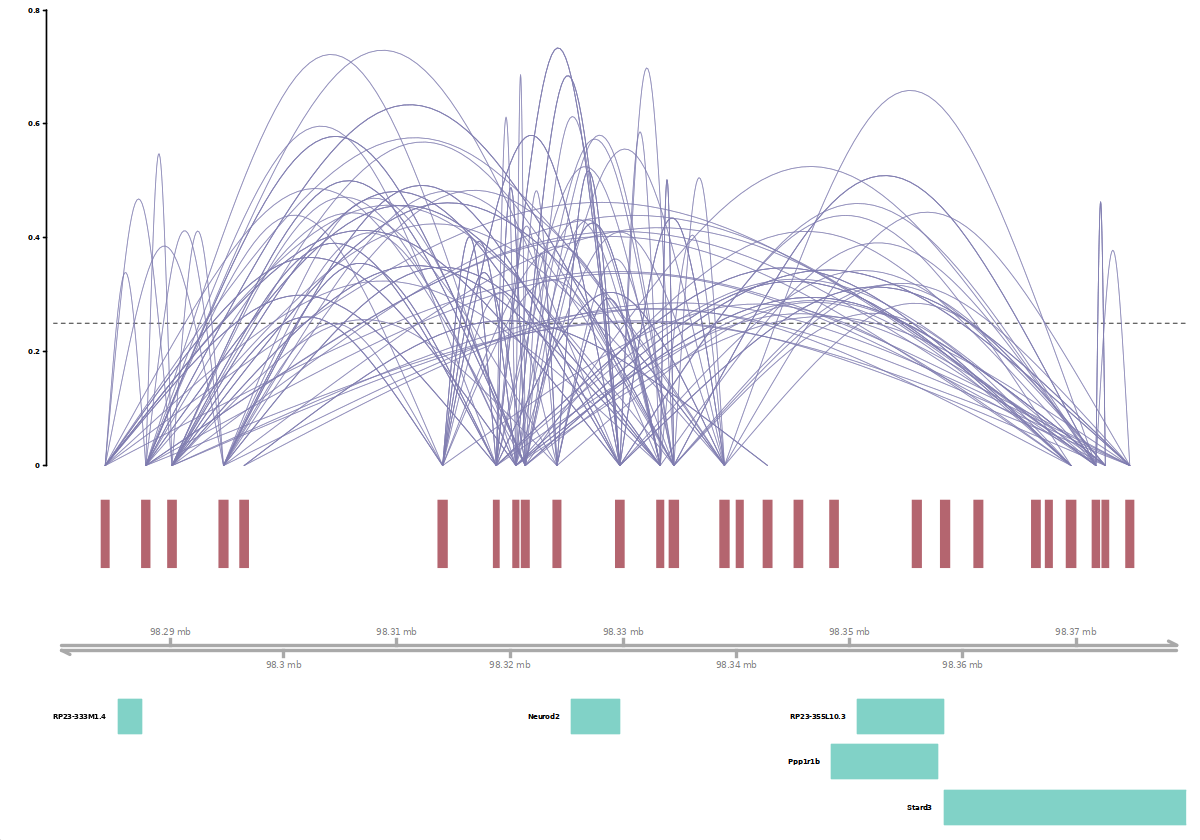

Cairo 
    3

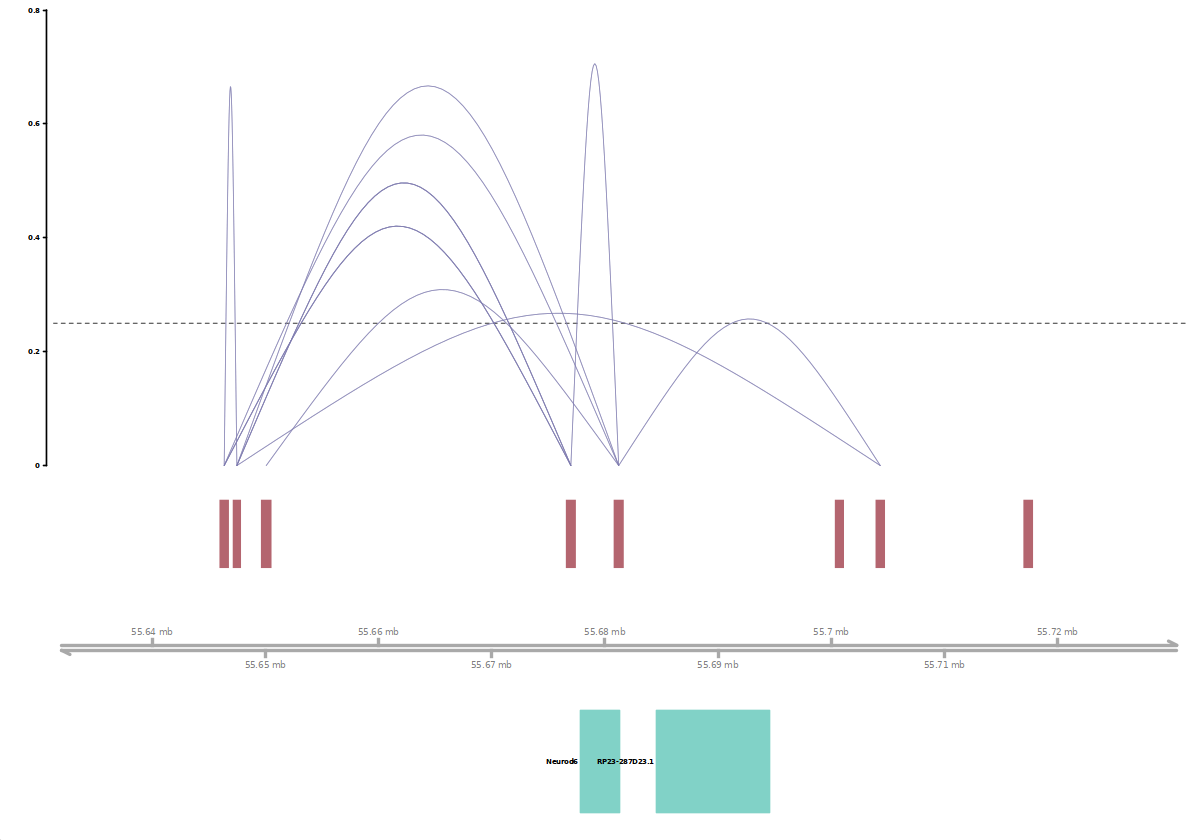

Cairo 
    3

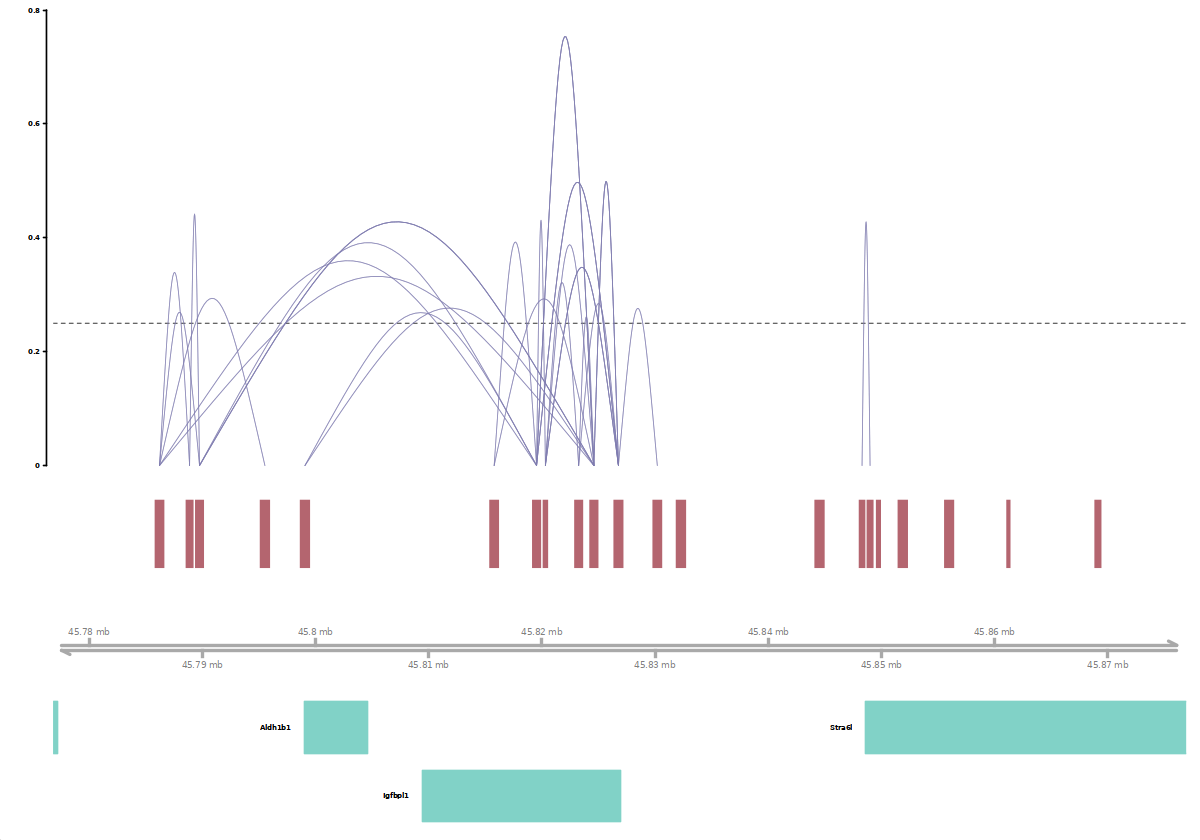

In [7]:
options(repr.plot.height = 7, repr.plot.width = 10)
dev.off()
CairoPDF("../data/2023-10-08_mouse_display/outdir/connections_neurons_chr11_98279644_98379645.pdf",width = 10,height = 7)
function_plot_connections_update("chr11", 98279644, 98379645)
dev.off()

CairoPDF("../data/2023-10-08_mouse_display/outdir/connections_neurons_chr6_55631262_55731263.pdf",width = 10,height = 7)
function_plot_connections_update("chr6",  55631262, 55731263)
dev.off()

CairoPDF("../data/2023-10-08_mouse_display/outdir/connections_neurons_chr4_45776826_45876827.pdf",width = 10,height = 7)
function_plot_connections_update("chr4",  45776826, 45876827)
dev.off()